In [98]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pmdarima as pm
from functools import reduce
import seaborn as sns

%run Thesis_Model_Function.ipynb

Run Complete: 15/07/2024 23:24:55


In [99]:
%run Thesis_Norway_Data_Prep.ipynb


Run Complete: 15/07/2024 23:24:56
Run Complete: 15/07/2024 23:25:00


## VARMAX Model Selection 

In [39]:
# Model Selection Needed
#  - No Exogenous variables pre COVID period - Best model 1 common, 3 regional, 2 AR, 3 MA - June 30th 
#  - With Exogenous variables pre-COVID period - Best Model 1 common, 5 regional, 2 AR, 5 MA - June 30th


#  - No Exogenous variables COVID period - Best Model 2 common, 3 regional, 2 AR, 4 MA
#  - With Exogenous variables COVID period - Best Model 3 common, 3 regional, 2 AR, 2 MA
import numpy as np
import random

train_size = 60
regional_logmort_train = vestland_logmort_full.iloc[:, :train_size]
country_logmort_train = all_nor_logmort.iloc[:, :train_size]
num_iters = 100
common_limit = 5
regional_limit = 5
ar_limit = 6
ma_limit = 6

track_params = np.full((common_limit+1, regional_limit+1, ar_limit+1, ma_limit+1), 0)
error_store = np.full((common_limit+1, regional_limit+1, ar_limit+1, ma_limit+1), np.inf)

for i in range(num_iters):
    # Initialize random parameters
    common_terms = random.randint(1, common_limit)
    regional_terms = random.randint(1, regional_limit)
    ar = random.randint(1, ar_limit)
    ma = random.randint(1, ma_limit)
    
    # Generate new parameters if already used
    while track_params[common_terms, regional_terms, ar, ma] == 1:
        common_terms = random.randint(1, common_limit)
        regional_terms = random.randint(1, regional_limit)
        ar = random.randint(1, ar_limit)
        ma = random.randint(1, ma_limit)
    
    try:
        # Train the model
        track_params[common_terms, regional_terms, ar, ma] = 1
        _, _, _, _, _, _, _, _, _, _, model, _, test_errors,_,_ = VARMAX_model(
            country_logmort_train, regional_logmort_train, 
            common_terms=common_terms, regional_terms=regional_terms, 
            prediction_period=20, train_period=40, AR=ar+1, MA=ma+1,
            
#             exogenous_train=exog_train_vestland, exogenous_test=exog_test_vestland,
#             country_deaths=nor_death, country_pop=nor_pop, 
#             region_deaths=vestland_death, region_pop=vestland_pop,
            
#             exogenous_train=exog_train_vestland_select, exogenous_test=exog_test_vestland_select,
             country_deaths=nor_death_select, country_pop=nor_pop_select, 
             region_deaths=vestland_death_select, region_pop=vestland_pop_select,
            re_est=False)
        print(test_errors)
        # Store the mean of test_errors in the appropriate location
        error_store[common_terms, regional_terms, ar, ma] = np.mean(test_errors) 
    except Exception as e:
        print(f"Error in configuration: AR={ar+1}, MA={ma+1}, Common Terms={common_terms}, Regional Terms={regional_terms}. Error: {str(e)}")
        error_store[common_terms, regional_terms, ar, ma] = np.inf  # Set a large error value
                
    print(f"Configuration {i+1} processed: AR={ar+1}, MA={ma+1}, Common Terms={common_terms}, Regional Terms={regional_terms}, Error={error_store[common_terms, regional_terms, ar, ma]}")

    
    
    
print(np.where(error_store == np.min(error_store)))

Error in configuration: AR=7, MA=7, Common Terms=5, Regional Terms=5. Error: Matrix is not positive definite
Configuration 1 processed: AR=7, MA=7, Common Terms=5, Regional Terms=5, Error=inf
Error in configuration: AR=5, MA=4, Common Terms=1, Regional Terms=5. Error: Matrix is not positive definite
Configuration 2 processed: AR=5, MA=4, Common Terms=1, Regional Terms=5, Error=inf
[2.11402546 3.93842024 1.84625636 2.44675513 1.51347368 2.44561455
 2.07213992]
Configuration 3 processed: AR=3, MA=2, Common Terms=1, Regional Terms=3, Error=2.3395264778740494
[2.52952998 4.62756061 1.6240653  2.3385222  1.42010035 2.36279076
 2.06529996]
Configuration 4 processed: AR=3, MA=4, Common Terms=2, Regional Terms=3, Error=2.423981308296661
Error in configuration: AR=4, MA=4, Common Terms=5, Regional Terms=3. Error: Matrix is not positive definite
Configuration 5 processed: AR=4, MA=4, Common Terms=5, Regional Terms=3, Error=inf
Error in configuration: AR=7, MA=2, Common Terms=4, Regional Terms=4.

In [41]:
np.min(error_store)

2.2269071654117973

In [43]:
np.min(error_store)

2.2269071654117973

In [30]:
_, _, _, _, _, _, _, _, _, _, model, _, test_errors = VARMAX_model(
                        country_logmort_train, regional_logmort_train, 
                        common_terms=3, regional_terms=3, 
                        prediction_period=20, train_period=40, AR=2, MA=6,
                        #exogenous_train = exog_train_vestland_select,exogenous_test = exog_test_vestland_select,
                        country_deaths = nor_death_select,country_pop=nor_pop_select, region_deaths=vestland_death_select,
                        region_pop=vestland_pop_select, re_est=True)

print(np.mean(test_errors))

1.5196521668187253


## SARIMAX Model Selection

In [123]:
print(f"Lowest Error Configuration: Index: {index}, AR: {ar + 1}, MA: {ma + 1}, Common Terms: {common_terms}, Regional Terms: {regional_terms}")
print(ar+1,ma+1,common_terms,regional_terms)
np.min(error_store)


Lowest Error Configuration: Index: 8, AR: 1, MA: 2, Common Terms: 3, Regional Terms: 3
1 2 3 3


1.2719502016269817

In [4]:
# Model Selection Needed
#  - No Exogenous variables pre COVID period - 2 common 2 regional
#  - With Exogenous variables pre-COVID period - 4 common 1 regional

#  - No Exogenous variables COVID period - 4 common 2 regional
#  - With Exogenous variables COVID period - 4 common 1 regional

train_size =  60 #84
regional_logmort_train = vestland_logmort_incCOVID.iloc[:,:train_size] #vestland_logmort_full.iloc[:,:train_size]
country_logmort_train = all_nor_logmort_incCOVID.iloc[:,:train_size] #all_nor_logmort.iloc[:,:train_size]
exog_train = exog_train_vestland.iloc[:40,] #exog_train_vestland_COVID.iloc[:60,] #exog_train_vestland.iloc[:40,]
exog_test = exog_train_vestland.iloc[40:,] # exog_train_vestland_COVID.iloc[60:,] #exog_train_vestland.iloc[40:,]

error_store = np.zeros((6,6))

for com in range(1,7):
    for reg in range(1,7):
        _,_,_,_,_,_,_,_,_,_,_,regional_predictions,_,_,model_error,res,_,_ = full_model(country_logmort_train,regional_logmort_train,
                                                                                    common_terms = com,regional_terms = reg,
                                                                                    prediction_period = 20,train_period = 40,
                                                                                    exogenous_train = exog_train,exogenous_test = exog_test,
                                                                                    country_deaths = nor_death_select, country_pop = nor_pop_select,
                                                                                    region_deaths = vestland_death_select,region_pop = vestland_pop_select,
                                                                                    
                                                                                    #exogenous_train = exog_train,exogenous_test = exog_test,
                                                                                    #country_deaths=nor_death, country_pop=nor_pop, 
                                                                                    #region_deaths=vestland_death, region_pop=vestland_pop,
                                                                                    re_est = False,smooth = False) 
        
        regional_predictions = pd.DataFrame(regional_predictions)
        regional_predictions.index = regional_logmort_train.index
        regional_predictions.columns = regional_logmort_train.columns
        
        errors = MAPE(regional_predictions.iloc[:,40:],regional_logmort_train.iloc[:,40:])
        error_store[com-1,reg-1] = np.mean(errors)
        
        
        
print(error_store)

Common k_t0 is white noise with LB p_value 0.21618966365101314
p_value k_t0 before re-estimation: 0.11238555276725314 

Regional k_t0 is white noise with LB p_value 0.11238555276725314 

p_value k_t0 after re-estimation: 0.11238555276725314 

Regional k_t0 is white noise with LB p_value 0.11238555276725314 

Common k_t0 is white noise with LB p_value 0.21618966365101314
p_value k_t0 before re-estimation: 0.11238555276725314 

Regional k_t0 is white noise with LB p_value 0.11238555276725314 

p_value k_t1 before re-estimation: 0.511468178478113 

Regional k_t1 is white noise with LB p_value 0.511468178478113 

p_value k_t0 after re-estimation: 0.11238555276725314 

Regional k_t0 is white noise with LB p_value 0.11238555276725314 

p_value k_t1 after re-estimation: 0.511468178478113 

Regional k_t1 is white noise with LB p_value 0.511468178478113 

Common k_t0 is white noise with LB p_value 0.21618966365101314
p_value k_t0 before re-estimation: 0.11238555276725314 

Regional k_t0 is whit

## SARIMAX Models

# Testing model with no common parameters

In [43]:
# Model Selection Needed
#  - No Exogenous variables pre COVID period - 4 Regional
#  - With Exogenous variables pre-COVID period - 4/5 Regional
#  - No Exogenous variables COVID period - 4 Regional
#  - With Exogenous variables COVID period - 4 Regional

train_size =  60 #84
regional_logmort_train = vestland_logmort_incCOVID.iloc[:,:train_size] #vestland_logmort_full.iloc[:,:train_size]
country_logmort_train = all_nor_logmort_incCOVID.iloc[:,:train_size] #all_nor_logmort.iloc[:,:train_size]
exog_train = exog_train_vestland.iloc[:40,] #exog_train_vestland_COVID.iloc[:60,] #exog_train_vestland.iloc[:40,]
exog_test = exog_train_vestland.iloc[40:,] #exog_train_vestland_COVID.iloc[60:,] #exog_train_vestland.iloc[40:,]

error_store = np.zeros((2,6))

for com in range(1,3):
    for reg in range(1,7):
        
        if com == 1:
            smth = True
        else:
            smth = False
        _,_,_,_,_,_,regional_predictions,_,_,model_error,res,_ = model_no_common(regional_logmort_train,
                                                                               regional_terms = reg,
                                                                               prediction_period = 20,train_period = 40,
                                                                               region_deaths = vestland_death,region_pop = vestland_pop,
                                                                               #exogenous_train = exog_train,exogenous_test = exog_test,
                                                                               re_est = False,smooth = smth)
 
        
        regional_predictions = pd.DataFrame(regional_predictions)
        regional_predictions.index = regional_logmort_train.index
        regional_predictions.columns = regional_logmort_train.columns
        
        errors = MAPE(regional_predictions.iloc[:,40:],regional_logmort_train.iloc[:,40:])
        error_store[com-1,reg-1] = np.mean(errors)
        
        
        
print(error_store)

p_value k_t0 before re-estimation: 0.03827296124378717 

Proportion of k_t values which are positive[0.6] 

Proportion of b_x values which are positive[0.] 

p_value k_t0 after re-estimation: 0.07651847661794937 

Regional k_t0 is white noise with LB p_value 0.07651847661794937 

p_value k_t0 before re-estimation: 0.03827296124378717 

p_value k_t1 before re-estimation: 3.692494514878708e-05 

Proportion of k_t values which are positive[0.6   0.425] 

Proportion of b_x values which are positive[0.         0.71428571] 

p_value k_t0 after re-estimation: 0.07651847661794937 

Regional k_t0 is white noise with LB p_value 0.07651847661794937 

p_value k_t1 after re-estimation: 0.048577005588086884 

p_value k_t0 before re-estimation: 0.03827296124378717 

p_value k_t1 before re-estimation: 3.692494514878708e-05 

p_value k_t2 before re-estimation: 8.949511090930195e-13 

Proportion of k_t values which are positive[0.6   0.425 0.475] 

Proportion of b_x values which are positive[0.         

p_value k_t0 before re-estimation: 0.7377667446220688 

Regional k_t0 is white noise with LB p_value 0.7377667446220688 

p_value k_t1 before re-estimation: 0.00799572263863028 

p_value k_t2 before re-estimation: 0.476939214643594 

Regional k_t2 is white noise with LB p_value 0.476939214643594 

p_value k_t3 before re-estimation: 1.3965363153788196e-08 

p_value k_t4 before re-estimation: 1.1440952747394483e-07 

Proportion of k_t values which are positive[0.41666667 0.55       0.43333333 0.5        0.41666667] 

Proportion of b_x values which are positive[0.         0.57142857 0.42857143 0.28571429 0.57142857] 

p_value k_t0 after re-estimation: 0.13231851559466984 

Regional k_t0 is white noise with LB p_value 0.13231851559466984 

p_value k_t1 after re-estimation: 0.1753776336032051 

Regional k_t1 is white noise with LB p_value 0.1753776336032051 

p_value k_t2 after re-estimation: 0.1169435941716321 

Regional k_t2 is white noise with LB p_value 0.1169435941716321 

p_value k_t3

<Figure size 640x480 with 0 Axes>

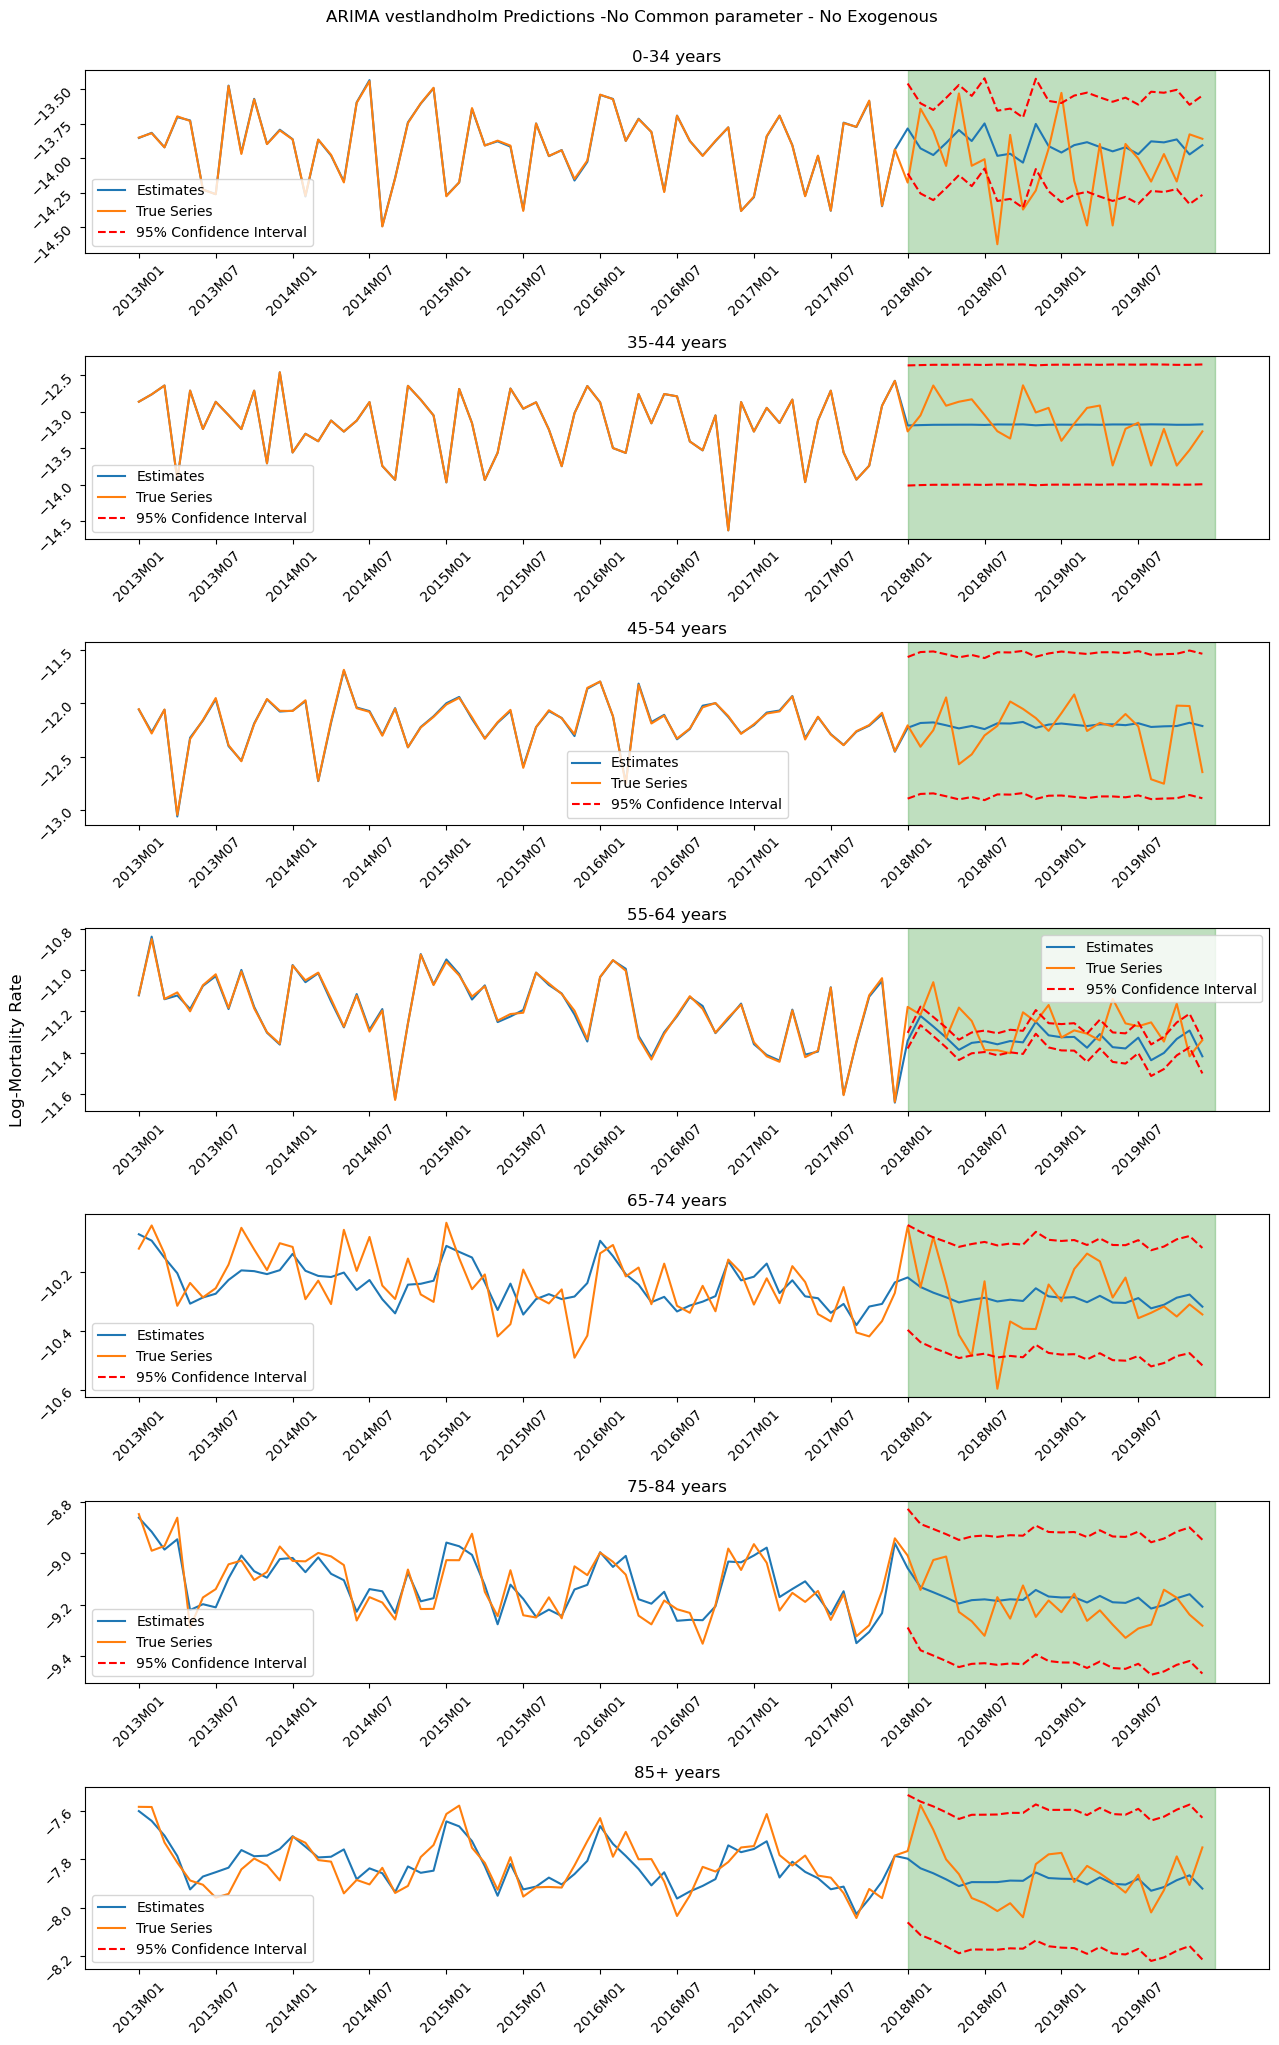

In [49]:
## Model No Common parameter - No Exogenous
a_xi,b_xs,k_ts,regional_re_est,k_t_models,k_t_preds,regional_predictions_nocommout,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_ = model_no_common(vestland_logmort_full,regional_terms = 5,prediction_period = 24,train_period = 60,region_deaths = vestland_death,region_pop = vestland_pop,re_est = False,smooth = False)

#exogenous_train = exog_train_vestland,exogenous_test = exog_test_vestland
regional_predictions_nocommout = pd.DataFrame(regional_predictions_nocommout)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_nocommout.index = vestland_logmort_full.index
regional_predictions_nocommout.columns = vestland_logmort_full.columns
regional_predictions_upconf.index = vestland_logmort_full.index
regional_predictions_upconf.columns = vestland_logmort_full.columns
regional_predictions_lowconf.index = vestland_logmort_full.index
regional_predictions_lowconf.columns = vestland_logmort_full.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_nocommout.iloc[:,:60],vestland_logmort_full.iloc[:,:60])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_nocommout.iloc[:,60:],vestland_logmort_full.iloc[:,60:])))
print(k_t_models["model_0"].summary())

error_NoCom_wout = MAPE(regional_predictions_nocommout.iloc[:,60:],vestland_logmort_full.iloc[:,60:])
prediction_plots(regional_predictions_nocommout,regional_predictions_upconf,regional_predictions_lowconf,24,vestland_logmort_full,suptitle = "ARIMA vestlandholm Predictions -No Common parameter - No Exogenous ")



In [50]:
print(k_t_models['model_0'].summary())
print(k_t_models['model_1'].summary())
print(k_t_models['model_2'].summary())
print(k_t_models['model_3'].summary())
print(k_t_models['model_4'].summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:                        SARIMAX   Log Likelihood                  37.694
Date:                Mon, 15 Jul 2024   AIC                            -73.388
Time:                        14:48:12   BIC                            -71.294
Sample:                             0   HQIC                           -72.569
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0167      0.003      5.385      0.000       0.011       0.023
Ljung-Box (L1) (Q):                   1.26   Jarque-Bera (JB):                 5.38
Prob(Q):                              0.26   Pr

p_value k_t0 before re-estimation: 0.8003816461670937 

Regional k_t0 is white noise with LB p_value 0.8003816461670937 

p_value k_t1 before re-estimation: 0.015205663541877322 

p_value k_t2 before re-estimation: 0.43158929896382 

Regional k_t2 is white noise with LB p_value 0.43158929896382 

p_value k_t3 before re-estimation: 5.5660741662952995e-05 

p_value k_t0 after re-estimation: 0.8003816461670937 

Regional k_t0 is white noise with LB p_value 0.8003816461670937 

p_value k_t1 after re-estimation: 0.015205663541877322 

p_value k_t2 after re-estimation: 0.4315892989638195 

Regional k_t2 is white noise with LB p_value 0.4315892989638195 

p_value k_t3 after re-estimation: 5.5660741662952995e-05 

Model Error 12.96782462668445
Re_estimation error Each Age Group (MAPE): [0.04688435 0.03584202 0.08538361 0.71892225 1.06371032 1.47001432
 1.58705534]

 Prediction Error Each Age Group (MAPE)[2.26617561 2.85550991 2.15733216 1.30561882 1.21520876 1.40508709
 1.76289229]
           

<Figure size 640x480 with 0 Axes>

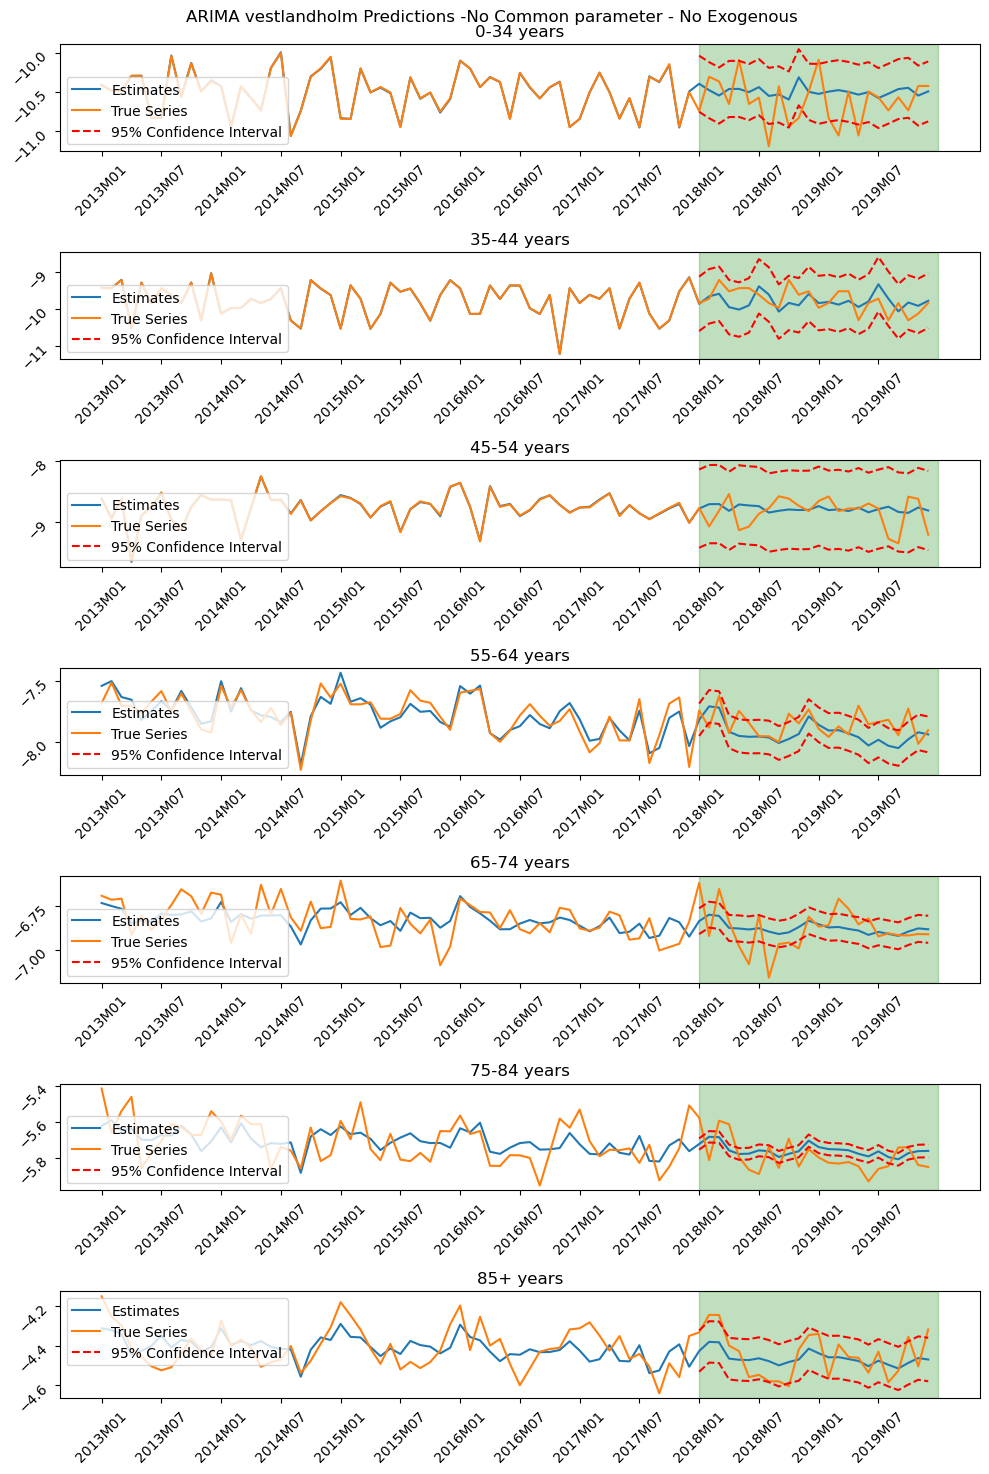

In [25]:
## Model No Common parameter - with Exogenous
a_xi,b_xs,k_ts,regional_re_est,k_t_models,k_t_preds,regional_predictions_nocommwith,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_ = model_no_common(vestland_logmort_full,regional_terms = 4,prediction_period = 24,train_period = 60,exogenous_train = exog_train_vestland,exogenous_test = exog_test_vestland,region_deaths = vestland_death,region_pop = vestland_pop,re_est = False,smooth = False)

#exogenous_train = exog_train_vestland,exogenous_test = exog_test_vestland
regional_predictions_nocommwith = pd.DataFrame(regional_predictions_nocommwith)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_nocommwith.index = vestland_logmort_full.index
regional_predictions_nocommwith.columns = vestland_logmort_full.columns
regional_predictions_upconf.index = vestland_logmort_full.index
regional_predictions_upconf.columns = vestland_logmort_full.columns
regional_predictions_lowconf.index = vestland_logmort_full.index
regional_predictions_lowconf.columns = vestland_logmort_full.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_nocommwith.iloc[:,:60],vestland_logmort_full.iloc[:,:60])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_nocommwith.iloc[:,60:],vestland_logmort_full.iloc[:,60:])))
print(k_t_models["model_0"].summary())

error_NoCom_with = MAPE(regional_predictions_nocommwith.iloc[:,60:],vestland_logmort_full.iloc[:,60:])
prediction_plots(regional_predictions_nocommwith,regional_predictions_upconf,regional_predictions_lowconf,24,vestland_logmort_full,suptitle = "ARIMA vestlandholm Predictions -No Common parameter - No Exogenous ")



In [26]:
print(k_t_models['model_0'].summary())
print(k_t_models['model_1'].summary())
print(k_t_models['model_2'].summary())
print(k_t_models['model_3'].summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   60
Model:                        SARIMAX   Log Likelihood                  45.162
Date:                Tue, 09 Jul 2024   AIC                            -78.324
Time:                        00:04:14   BIC                            -65.758
Sample:                             0   HQIC                           -73.409
                                 - 60                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
av_temp        0.0049      0.007      0.672      0.502      -0.009       0.019
av_humid       0.0004      0.001      0.595      0.552      -0.001       0.002
temp_below    -0.0118      0.035     -0.337      0.7

# SARIMAX Models pre-COVID With Common terms

p_value k_t0 before re-estimation: 0.8949936702789824 

Regional k_t0 is white noise with LB p_value 0.8949936702789824 

p_value k_t1 before re-estimation: 0.008895884405045096 

p_value k_t0 after re-estimation: 0.8949936702789824 

Regional k_t0 is white noise with LB p_value 0.8949936702789824 

p_value k_t1 after re-estimation: 0.008895884405045096 

Model Error 10.48472778900112
Re_estimation error Each Age Group (MAPE): [0.37735869 0.51826819 1.80235707 1.54610548 1.00756911 1.116605
 1.37726264]

 Prediction Error Each Age Group (MAPE)[2.28651042 3.47170606 1.90499222 1.11592263 1.31379624 1.15622363
 2.04110096]


<Figure size 640x480 with 0 Axes>

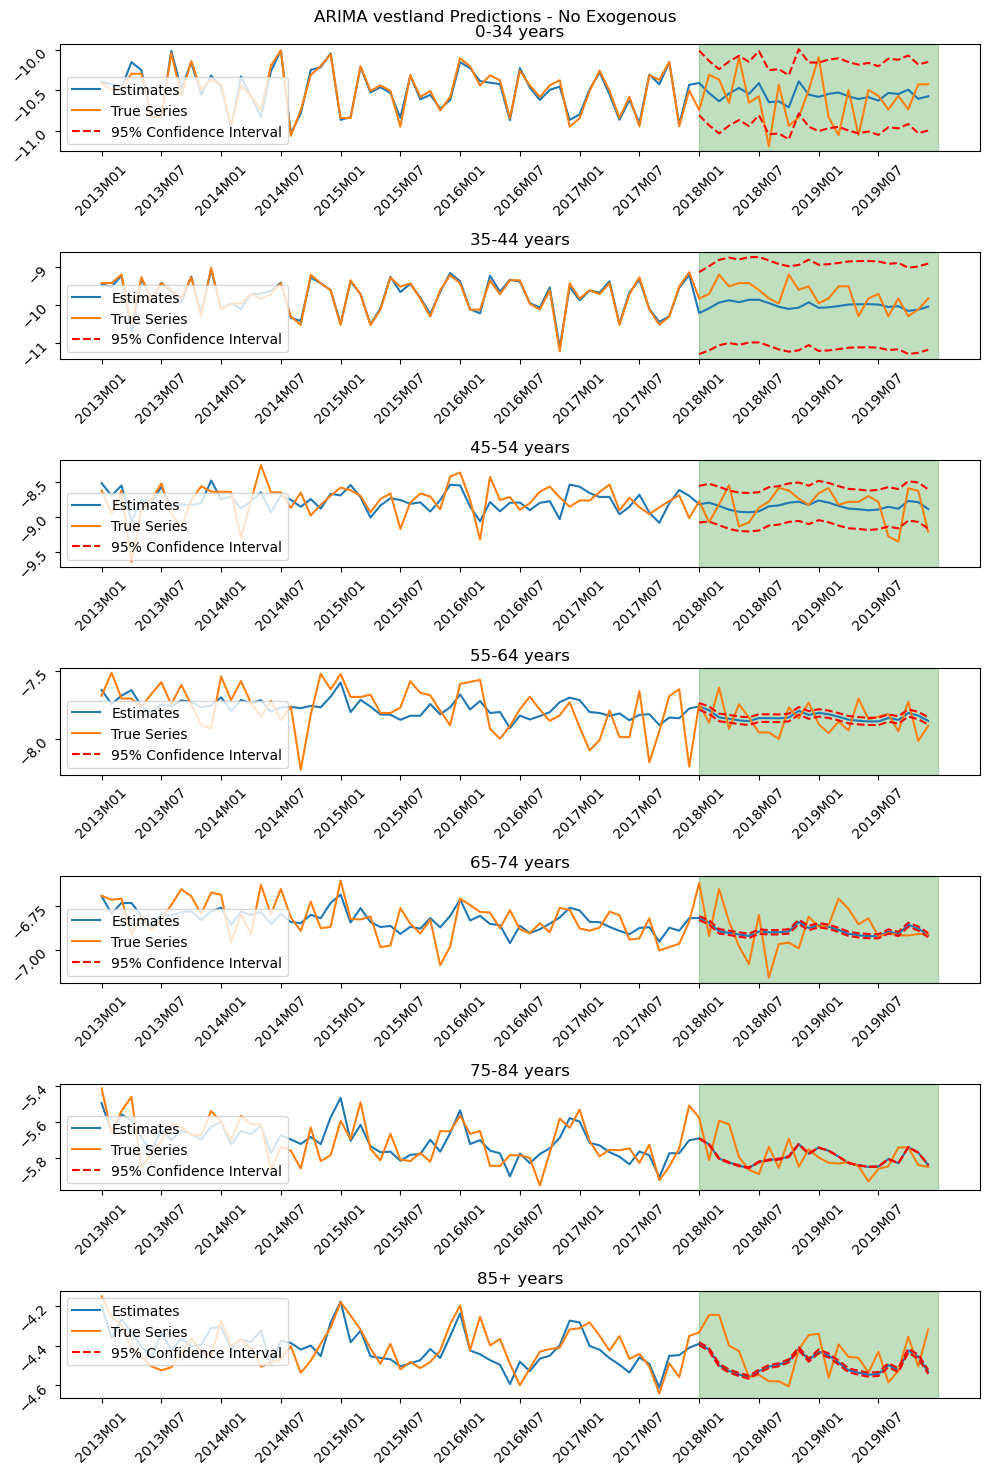

In [17]:
### Without Exogenous
a_xi,B_xs,K_ts,b_xs,k_ts,country_re_est,regional_re_est,K_t_models,k_t_models,K_t_preds,k_t_preds,regional_predictions_sarout,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_,_ = full_model(all_nor_logmort,vestland_logmort_full, common_terms = 2,regional_terms = 2,prediction_period = 24,train_period = 60,country_deaths = nor_death, country_pop = nor_pop,region_deaths = vestland_death,region_pop = vestland_pop,re_est = False,smooth = False)  


regional_predictions_sarout = pd.DataFrame(regional_predictions_sarout)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_sarout.index = vestland_logmort_full.index
regional_predictions_sarout.columns = vestland_logmort_full.columns
regional_predictions_upconf.index = vestland_logmort_full.index
regional_predictions_upconf.columns = vestland_logmort_full.columns
regional_predictions_lowconf.index = vestland_logmort_full.index
regional_predictions_lowconf.columns = vestland_logmort_full.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_sarout.iloc[:,:60],vestland_logmort_full.iloc[:,:60])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_sarout.iloc[:,60:],vestland_logmort_full.iloc[:,60:])))

error_SARIMAX_wout = MAPE(regional_predictions_sarout.iloc[:,60:],vestland_logmort_full.iloc[:,60:])
prediction_plots(regional_predictions_sarout,regional_predictions_upconf,regional_predictions_lowconf,24,vestland_logmort_full,suptitle = "ARIMA vestland Predictions - No Exogenous")



In [57]:
for mod in K_t_models.keys():
    print(str(K_t_models[mod].get_params()["order"]) + str(K_t_models[mod].get_params()["seasonal_order"]))
    
print("-")

for mod in k_t_models.keys():
    print(str(k_t_models[mod].get_params()["order"]) + str(k_t_models[mod].get_params()["seasonal_order"]))
 



(0, 0, 1)(1, 1, 0, 12)
-
(1, 0, 0)(0, 0, 0, 12)
(0, 0, 0)(2, 0, 0, 12)
(2, 1, 1)(2, 0, 0, 12)
(5, 1, 0)(0, 0, 0, 12)
(0, 0, 0)(0, 0, 0, 12)


Common k_t2 is white noise with LB p_value 0.8983366501621832
Common k_t3 is white noise with LB p_value 0.16801159481304923
p_value k_t0 before re-estimation: 0.9532983136286494 

Regional k_t0 is white noise with LB p_value 0.9532983136286494 

p_value k_t0 after re-estimation: 0.9532983136286494 

Regional k_t0 is white noise with LB p_value 0.9532983136286494 

Re_estimation error Each Age Group (MAPE): [1.81736495 0.50861878 1.80095449 1.53951508 1.03589469 1.04193377
 1.2273281 ]

 Prediction Error Each Age Group (MAPE)[2.09742498 3.49432075 2.35617106 1.14612944 1.3759686  1.24586632
 1.82934988]


<Figure size 640x480 with 0 Axes>

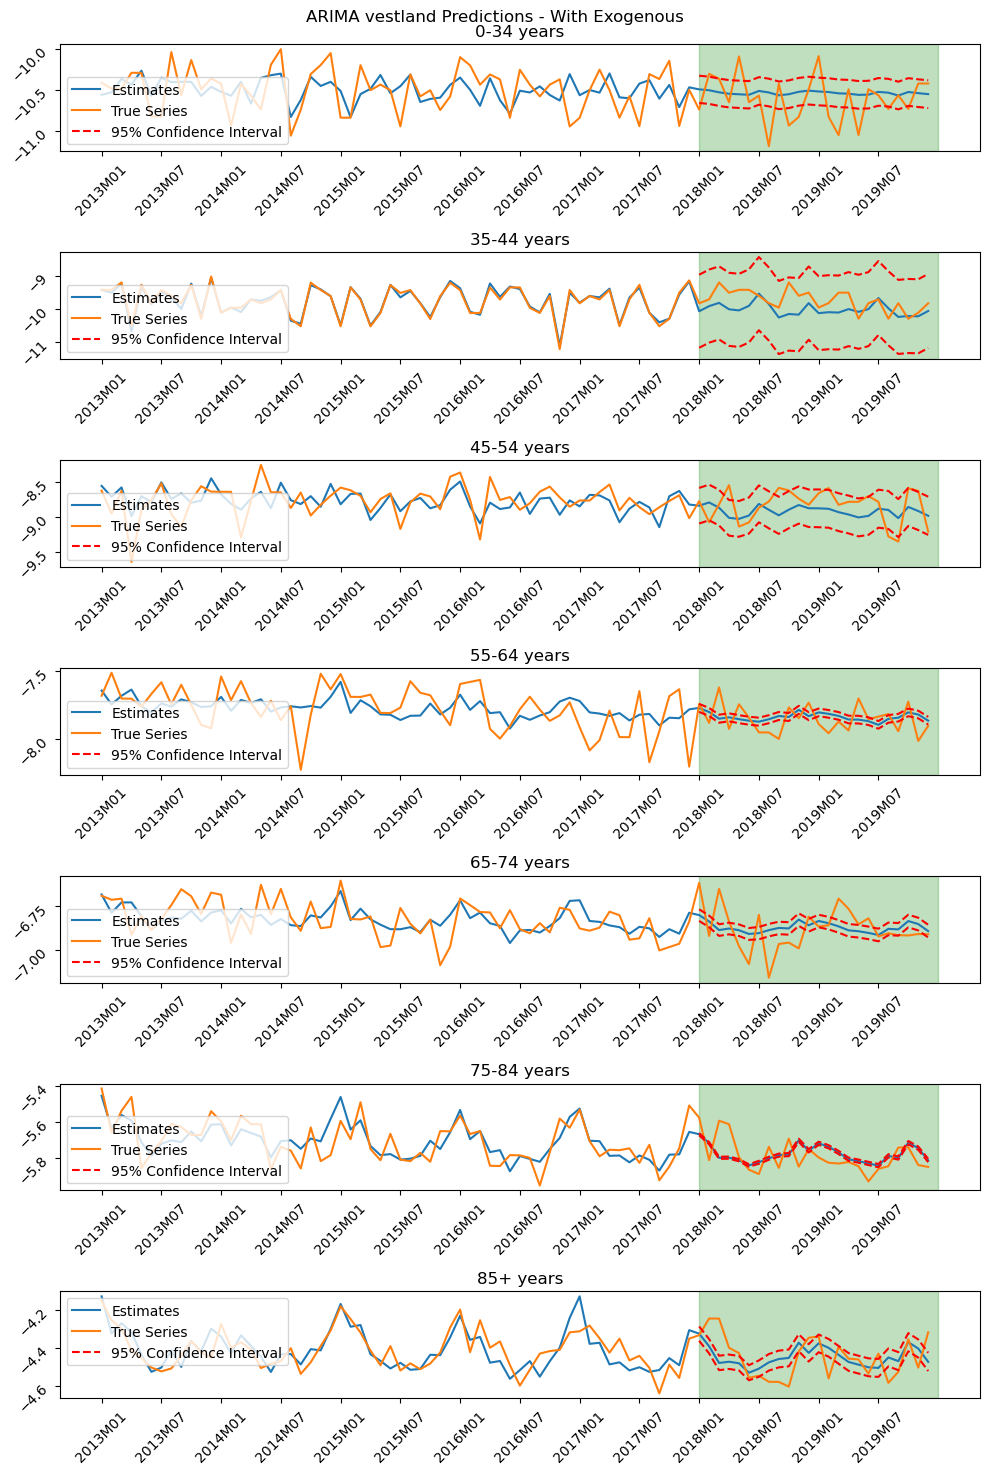

In [18]:
### With Exogenous
a_xi,B_xs,K_ts,b_xs,k_ts,country_re_est,regional_re_est,K_t_models,k_t_models,K_t_preds,k_t_preds,regional_predictions_sarwith,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_,_ = full_model(all_nor_logmort,vestland_logmort_full, common_terms = 4,regional_terms = 1,prediction_period = 24,train_period = 60,exogenous_train = exog_train_vestland,exogenous_test = exog_test_vestland,country_deaths = nor_death, country_pop = nor_pop,region_deaths = vestland_death,region_pop = vestland_pop,re_est = False,smooth=False)  


regional_predictions_sarwith = pd.DataFrame(regional_predictions_sarwith)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_sarwith.index = vestland_logmort_full.index
regional_predictions_sarwith.columns = vestland_logmort_full.columns
regional_predictions_upconf.index = vestland_logmort_full.index
regional_predictions_upconf.columns = vestland_logmort_full.columns
regional_predictions_lowconf.index = vestland_logmort_full.index
regional_predictions_lowconf.columns = vestland_logmort_full.columns

print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_sarwith.iloc[:,:60],vestland_logmort_full.iloc[:,:60])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_sarwith.iloc[:,60:],vestland_logmort_full.iloc[:,60:])))

#print(str(k_t_models["model_0"].summary()))
#print(k_t_models["model_1"].summary())
error_SARIMAX_w= MAPE(regional_predictions_sarwith.iloc[:,60:],vestland_logmort_full.iloc[:,60:])

prediction_plots(regional_predictions_sarwith,regional_predictions_upconf,regional_predictions_lowconf,24,vestland_logmort_full,suptitle = "ARIMA vestland Predictions - With Exogenous")



In [60]:
for mod in K_t_models.keys():
    print(str(K_t_models[mod].get_params()["order"]) + str(K_t_models[mod].get_params()["seasonal_order"]))
    
print("-")

for mod in k_t_models.keys():
    print(str(k_t_models[mod].get_params()["order"]) + str(k_t_models[mod].get_params()["seasonal_order"]))
 



(0, 0, 1)(1, 1, 0, 12)
-
(0, 0, 0)(0, 0, 0, 12)


## VARMAX Models

test_errors[2.10450053 2.61177216 2.10447064 1.68838599 1.96313195 2.45972986
 2.38761997]


<Figure size 640x480 with 0 Axes>

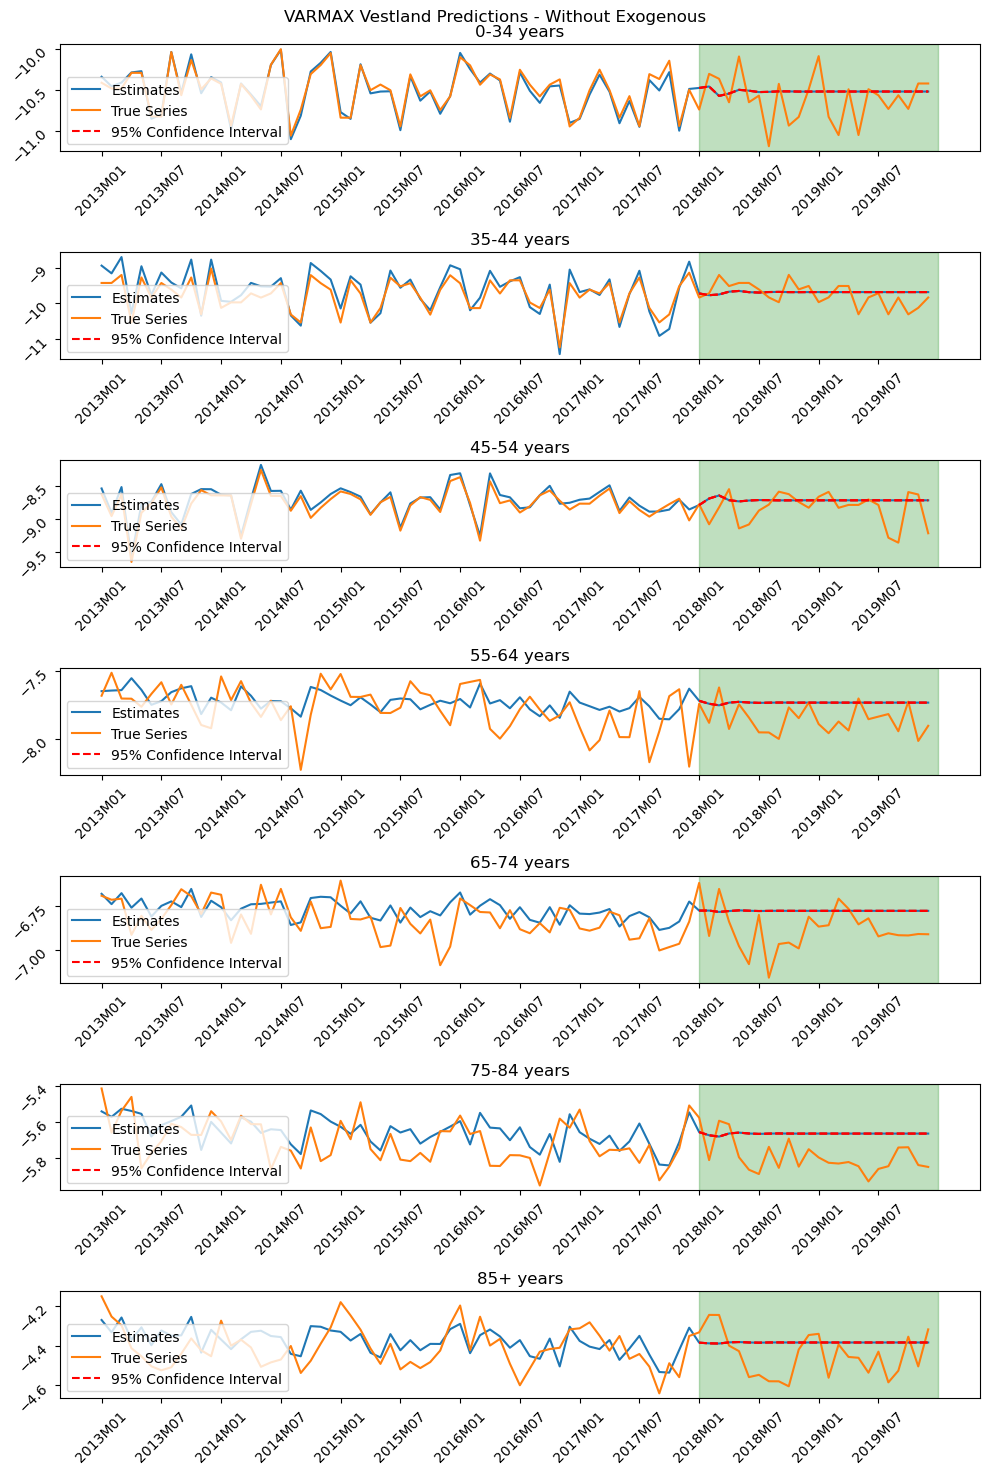

In [23]:
### Without Exogenous
all_k_t, K_ts,k_ts,B_xs,b_xs,a_xi,all_k_preds,predictions_varout,predictions_lowconf,predictions_upconf,model_VAR_wout,aic,error_VAR_wout,_,_ = VARMAX_model(all_nor_logmort,vestland_logmort_full, common_terms = 1,regional_terms = 3,prediction_period = 24,train_period = 60,AR= 2,MA = 3,country_deaths = nor_death,country_pop = nor_pop,region_deaths = vestland_death,region_pop = vestland_pop,re_est = False,smooth = False)

print("test_errors" + str(error_VAR_wout))
prediction_plots(predictions_varout,predictions_varout,predictions_varout,24,vestland_logmort_full,suptitle = "VARMAX Vestland Predictions - Without Exogenous")



test_errors[2.16440707 3.55548723 2.39298526 2.06543915 1.80262981 2.60005681
 1.94879887]


<Figure size 640x480 with 0 Axes>

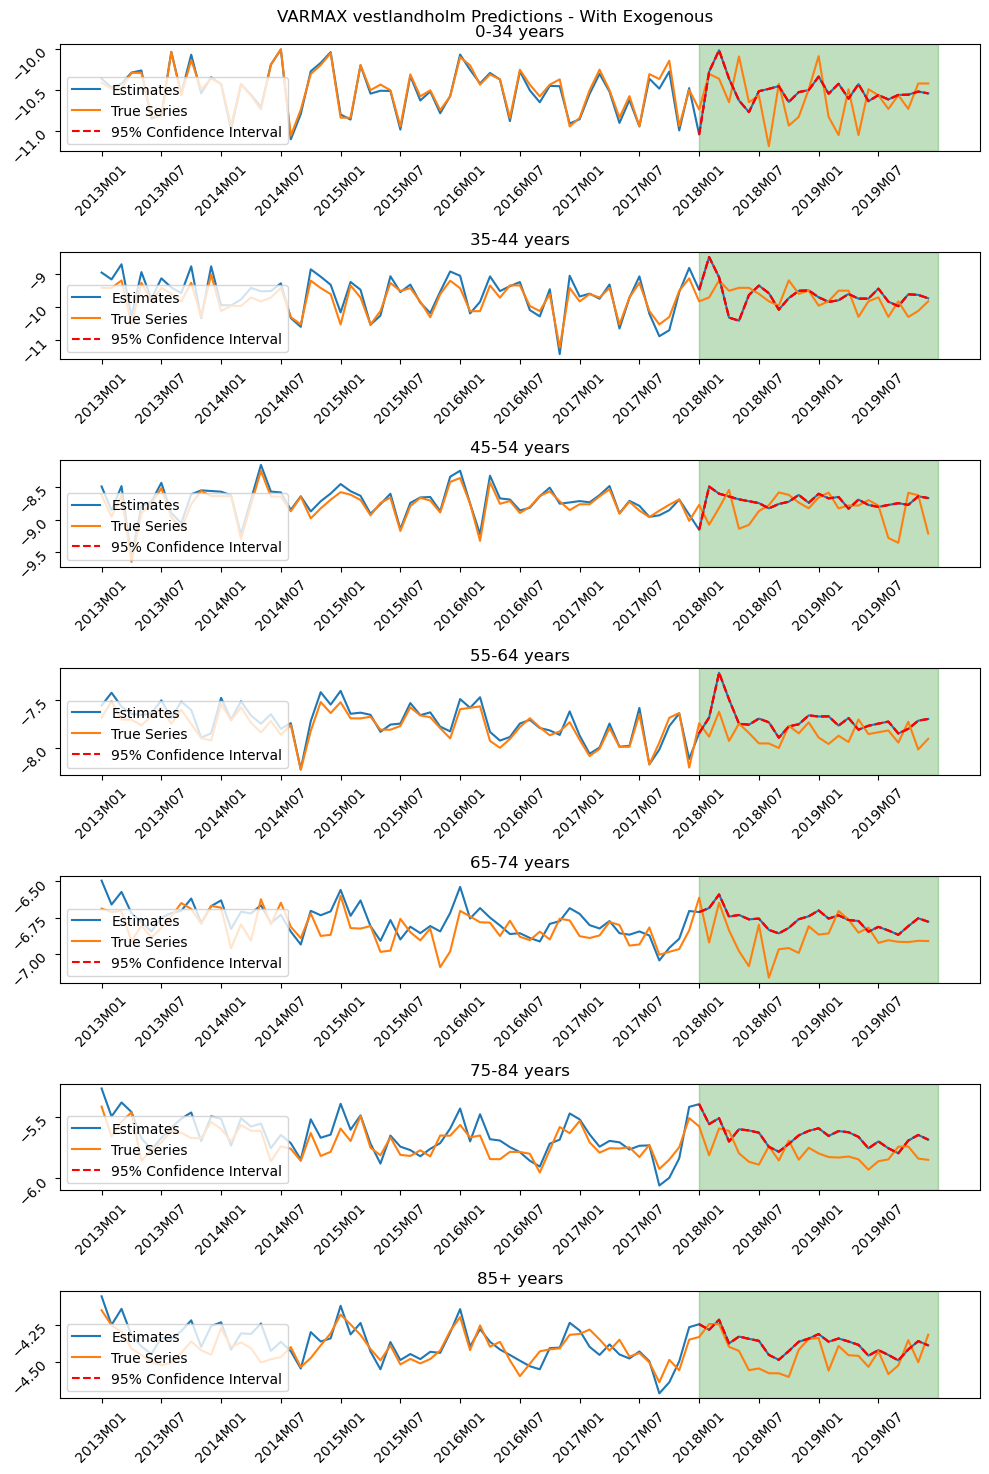

In [20]:
### With Exogenous
all_k_t, K_ts,k_ts,B_xs,b_xs,a_xi,all_k_preds,predictions_varwith,predictions_lowconf,predictions_upconf,model_VAR_with,aic,error_VAR_w,_,_ = VARMAX_model(all_nor_logmort,vestland_logmort_full, common_terms = 1,regional_terms = 5,prediction_period = 24,train_period = 60,AR= 2,MA = 5,exogenous_train = exog_train_vestland,exogenous_test = exog_test_vestland,country_deaths = nor_death,country_pop = nor_pop,region_deaths = vestland_death,region_pop = vestland_pop,re_est = False)

print("test_errors" + str(error_VAR_w))
prediction_plots(predictions_varwith,predictions_varwith,predictions_varwith,24,vestland_logmort_full,suptitle = "VARMAX Vestland Predictions - With Exogenous")



In [42]:
model_VAR_with.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                            
=================================================================================
Dep. Variable:     [0, 1, 2, 3, 4, 5, 6]   No. Observations:                   60
Model:                       VARMAX(2,5)   Log Likelihood                 191.136
                             + intercept   AIC                            443.727
Date:                   Wed, 12 Jun 2024   BIC                           1308.691
Time:                           11:57:50   HQIC                           782.062
Sample:                                0                                         
                                    - 60                                         
Covariance Type:                     opg                                         
===============================================================================================================================
Ljung-Box (L1) (Q):     0.45, 5.37, 4.92, 0.57, 0.00, 0.02, 0.15   Jarque-Bera (JB):   0.91, 2.75, 1.97, 0.78, 0.22, 0.37, 0.20
Prob(Q):                0.50, 0.02, 0.03, 0.45, 0.99, 0.89, 0.70   Prob(JB):           0.63, 0.25, 0.37, 0.68, 0.90, 0.83, 0.91
Heteroskedasticity (H): 0.98, 1.71, 1.26, 0.97, 1.52, 1.70, 1.60   Skew:               0.30, 0.42, 0.24, 0.19, 0.06, 0.19, 0.07
Prob(H) (two-sided):    0.97, 0.24, 0.61, 0.95, 0.36, 0.24, 0.30   Kurtosis:           3.01, 2.36, 2.26, 2.60, 3.27, 2.90, 2.75
                               Results for equation 0                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -0.1934      0.002   -104.484      0.000      -0.197      -0.190
L1.0                0.1206      0.004     34.378      0.000       0.114       0.128
L1.1               -0.0376      0.007     -5.153      0.000      -0.052      -0.023
L1.2                0.0303      0.004      8.642      0.000       0.023       0.037
L1.3               -0.1976      0.005    -43.061      0.000      -0.207      -0.189
L1.4                0.1775      0.003     56.833      0.000       0.171       0.184
L1.5                0.0411      0.004      9.975      0.000       0.033       0.049
L1.6                0.0035      0.003      1.211      0.226      -0.002       0.009
L2.0                0.4342      0.048      9.036      0.000       0.340       0.528
L2.1               -0.0444      0.011     -4.188      0.000      -0.065      -0.024
L2.2               -0.2047      0.004    -53.990      0.000      -0.212      -0.197
L2.3                0.2528      0.025      9.946      0.000       0.203       0.303
L2.4               -0.2768      0.043     -6.474      0.000      -0.361      -0.193
L2.5               -0.3596      0.057     -6.327      0.000      -0.471      -0.248
L2.6                0.4821      0.041     11.690      0.000       0.401       0.563
L1.e(0)            -0.1988      0.006    -31.643      0.000      -0.211      -0.186
L1.e(1)             0.1474      0.012     12.637      0.000       0.125       0.170
L1.e(2)             0.0347      0.043      0.800      0.424      -0.050       0.120
L1.e(3)            -0.0152      0.017     -0.904      0.366      -0.048       0.018
L1.e(4)             0.3218      0.013     25.075      0.000       0.297       0.347
L1.e(5)             0.4506      0.024     19.056      0.000       0.404       0.497
L1.e(6)            -0.2768      0.006    -45.158      0.000      -0.289      -0.265
L2.e(0)             0.1584      0.028      5.564      0.000       0.103       0.214
L2.e(1)            -0.1616      0.014    -11.749      0.000      -0.189      -0.135
L2.e(2)             0.2086      0.016     12.650      0.000       0.176       0.241
L2.e(3)             0.1777      0.047      3.795      0.

In [16]:
all_nor_logmort.index

Index(['0-34 years', '35-44 years', '45-54 years', '55-64 years',
       '65-74 years', '75-84 years', '85+ years'],
      dtype='object', name='Age_band')

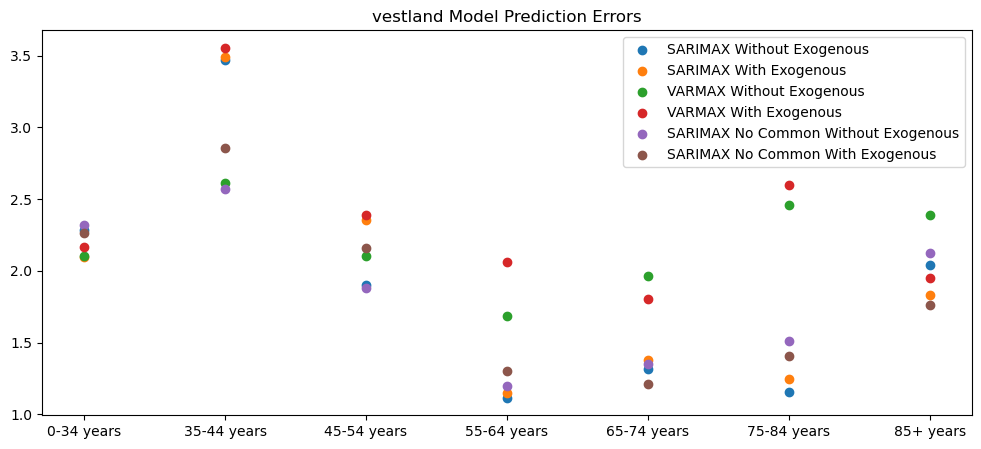

In [21]:
test_errors = np.vstack((error_SARIMAX_wout,error_SARIMAX_w,error_VAR_wout,error_VAR_w,error_NoCom_wout,error_NoCom_with))
vestland = test_errors

age_groups = all_nor_logmort.index
plt.figure(figsize = (12,5))
plt.scatter(age_groups,vestland[0,:],label = "SARIMAX Without Exogenous")
plt.scatter(age_groups,vestland[1,:],label = "SARIMAX With Exogenous")
plt.scatter(age_groups,vestland[2,:],label = "VARMAX Without Exogenous")
plt.scatter(age_groups,vestland[3,:],label = "VARMAX With Exogenous")
plt.scatter(age_groups,vestland[4,:],label = "SARIMAX No Common Without Exogenous")
plt.scatter(age_groups,vestland[5,:],label = "SARIMAX No Common With Exogenous")
plt.legend();
plt.title("vestland Model Prediction Errors");

In [22]:
np.mean(vestland,axis = 1)

array([1.89860745, 1.93503301, 2.18851587, 2.3614006 , 1.8527894 ,
       1.85254638])

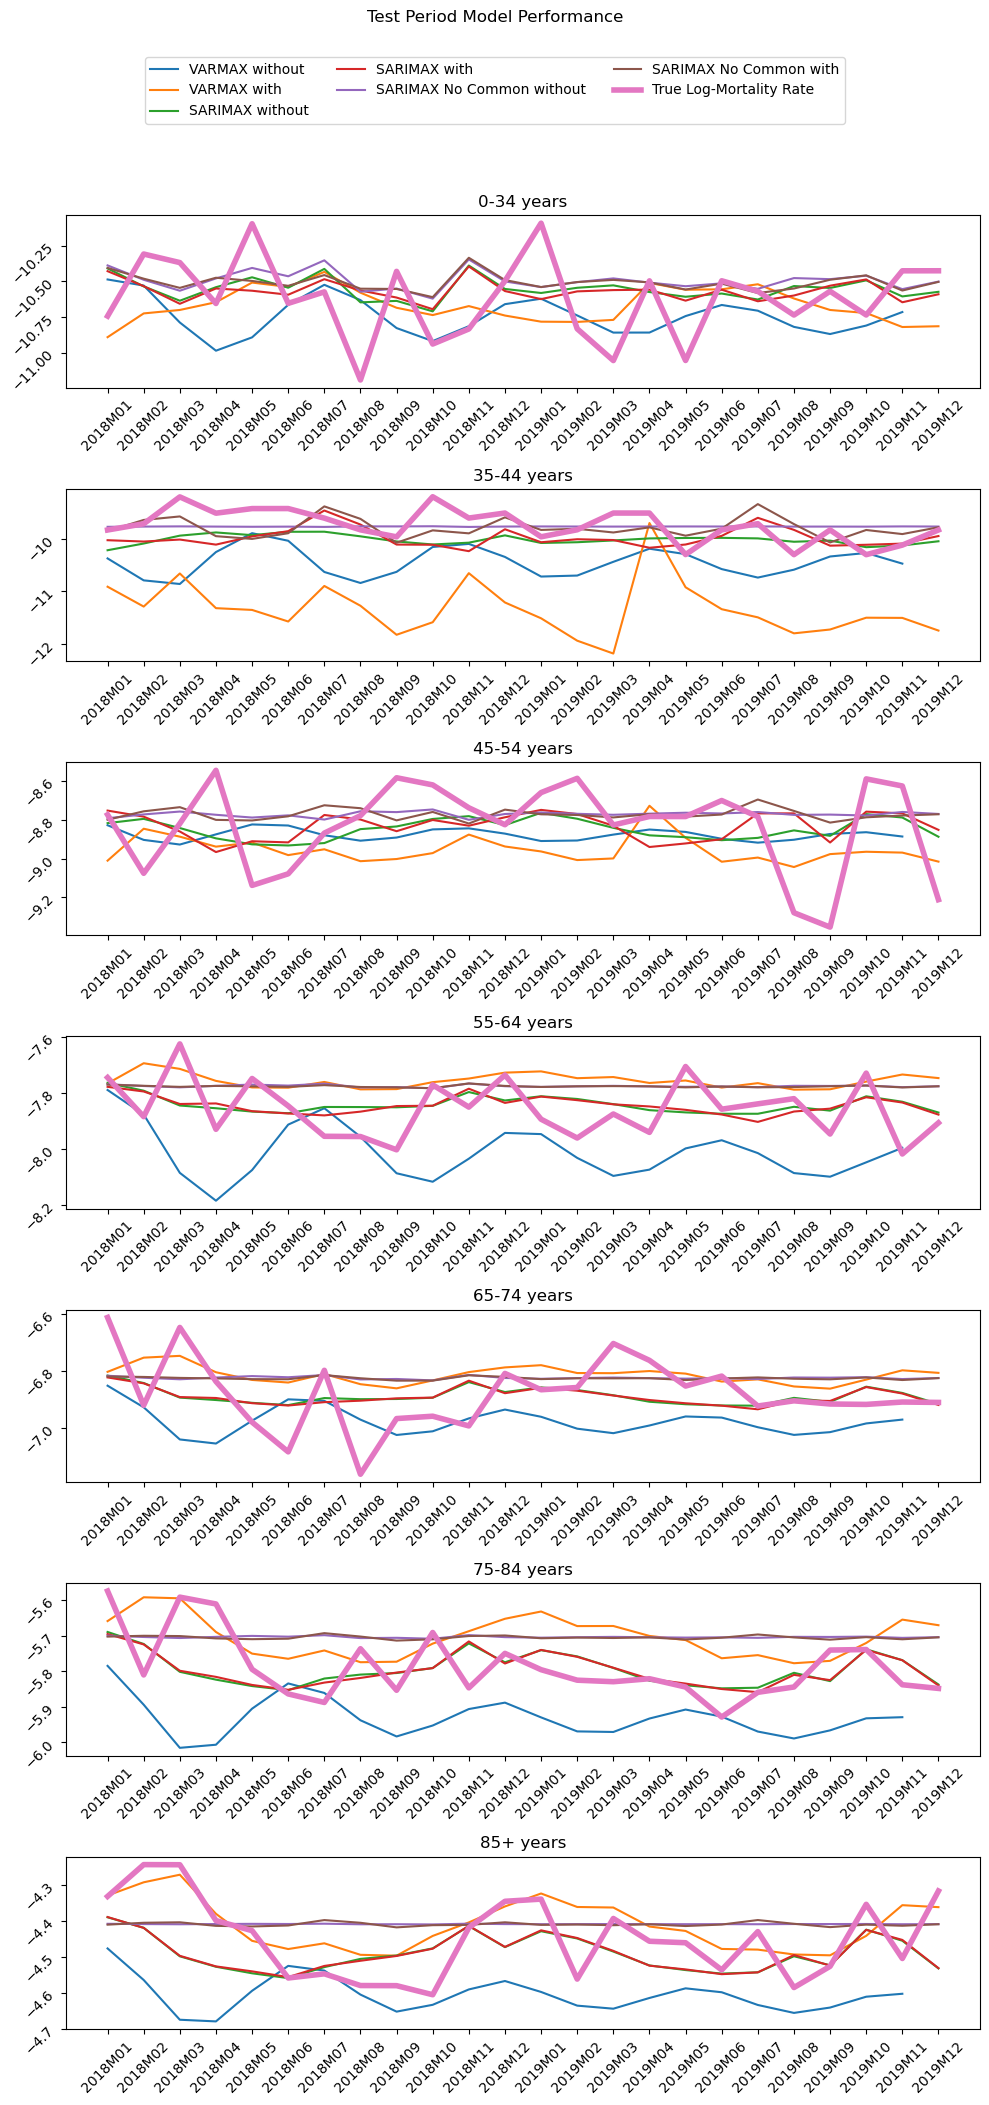

In [17]:
predictions_varwith = pd.DataFrame(predictions_varwith)
predictions_varwith.index = vestland_logmort_full.index
predictions_varwith.columns = vestland_logmort_full.columns

predictions_varout = pd.DataFrame(predictions_varout)
predictions_varout.index = vestland_logmort_full.index
predictions_varout.columns = vestland_logmort_full.columns


age_groups = all_nor_logmort.index
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 20))

# Store lines and labels to create a single legend
lines = []
labels = []

for row in range(7):
    age = age_groups[row]
    axes[row].set_title(age)
    
    line1, = axes[row].plot(predictions_varout.iloc[row, 60:], label="VARMAX without")
    line2, = axes[row].plot(predictions_varwith.iloc[row, 60:], label="VARMAX with")
    line3, = axes[row].plot(regional_predictions_sarout.iloc[row, 60:], label="SARIMAX without")
    line4, = axes[row].plot(regional_predictions_sarwith.iloc[row, 60:], label="SARIMAX with")
    line5, = axes[row].plot(regional_predictions_nocommout.iloc[row, 60:], label="SARIMAX No Common without")
    line6, = axes[row].plot(regional_predictions_nocommwith.iloc[row, 60:], label="SARIMAX No Common with")
    line7, = axes[row].plot(vestland_logmort_full.iloc[row, 60:], label="True Log-Mortality Rate", linewidth=4)
    
    axes[row].tick_params(rotation=45)
    
    # Collect lines and labels for the legend
    if row == 0:
        lines.extend([line1, line2, line3, line4, line5, line6, line7])
        labels.extend([line.get_label() for line in lines])

# Create a single legend
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=3)
plt.suptitle("Test Period Model Performance", y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# COVID Period Modelling

p_value k_t0 before re-estimation: 0.970829771858083 

Regional k_t0 is white noise with LB p_value 0.970829771858083 

p_value k_t1 before re-estimation: 0.2704096147230933 

Regional k_t1 is white noise with LB p_value 0.2704096147230933 

p_value k_t2 before re-estimation: 0.25303950767681627 

Regional k_t2 is white noise with LB p_value 0.25303950767681627 

p_value k_t3 before re-estimation: 2.1852493262237766e-20 

Proportion of k_t values which are positive[0.42857143 0.55952381 0.48809524 0.52380952] 

Proportion of b_x values which are positive[0.         0.71428571 0.28571429 0.42857143] 

p_value k_t0 after re-estimation: 0.09568208455612652 

Regional k_t0 is white noise with LB p_value 0.09568208455612652 

p_value k_t1 after re-estimation: 0.7675545472541051 

Regional k_t1 is white noise with LB p_value 0.7675545472541051 

p_value k_t2 after re-estimation: 0.6470034839402973 

Regional k_t2 is white noise with LB p_value 0.6470034839402973 

p_value k_t3 after re-estim

<Figure size 640x480 with 0 Axes>

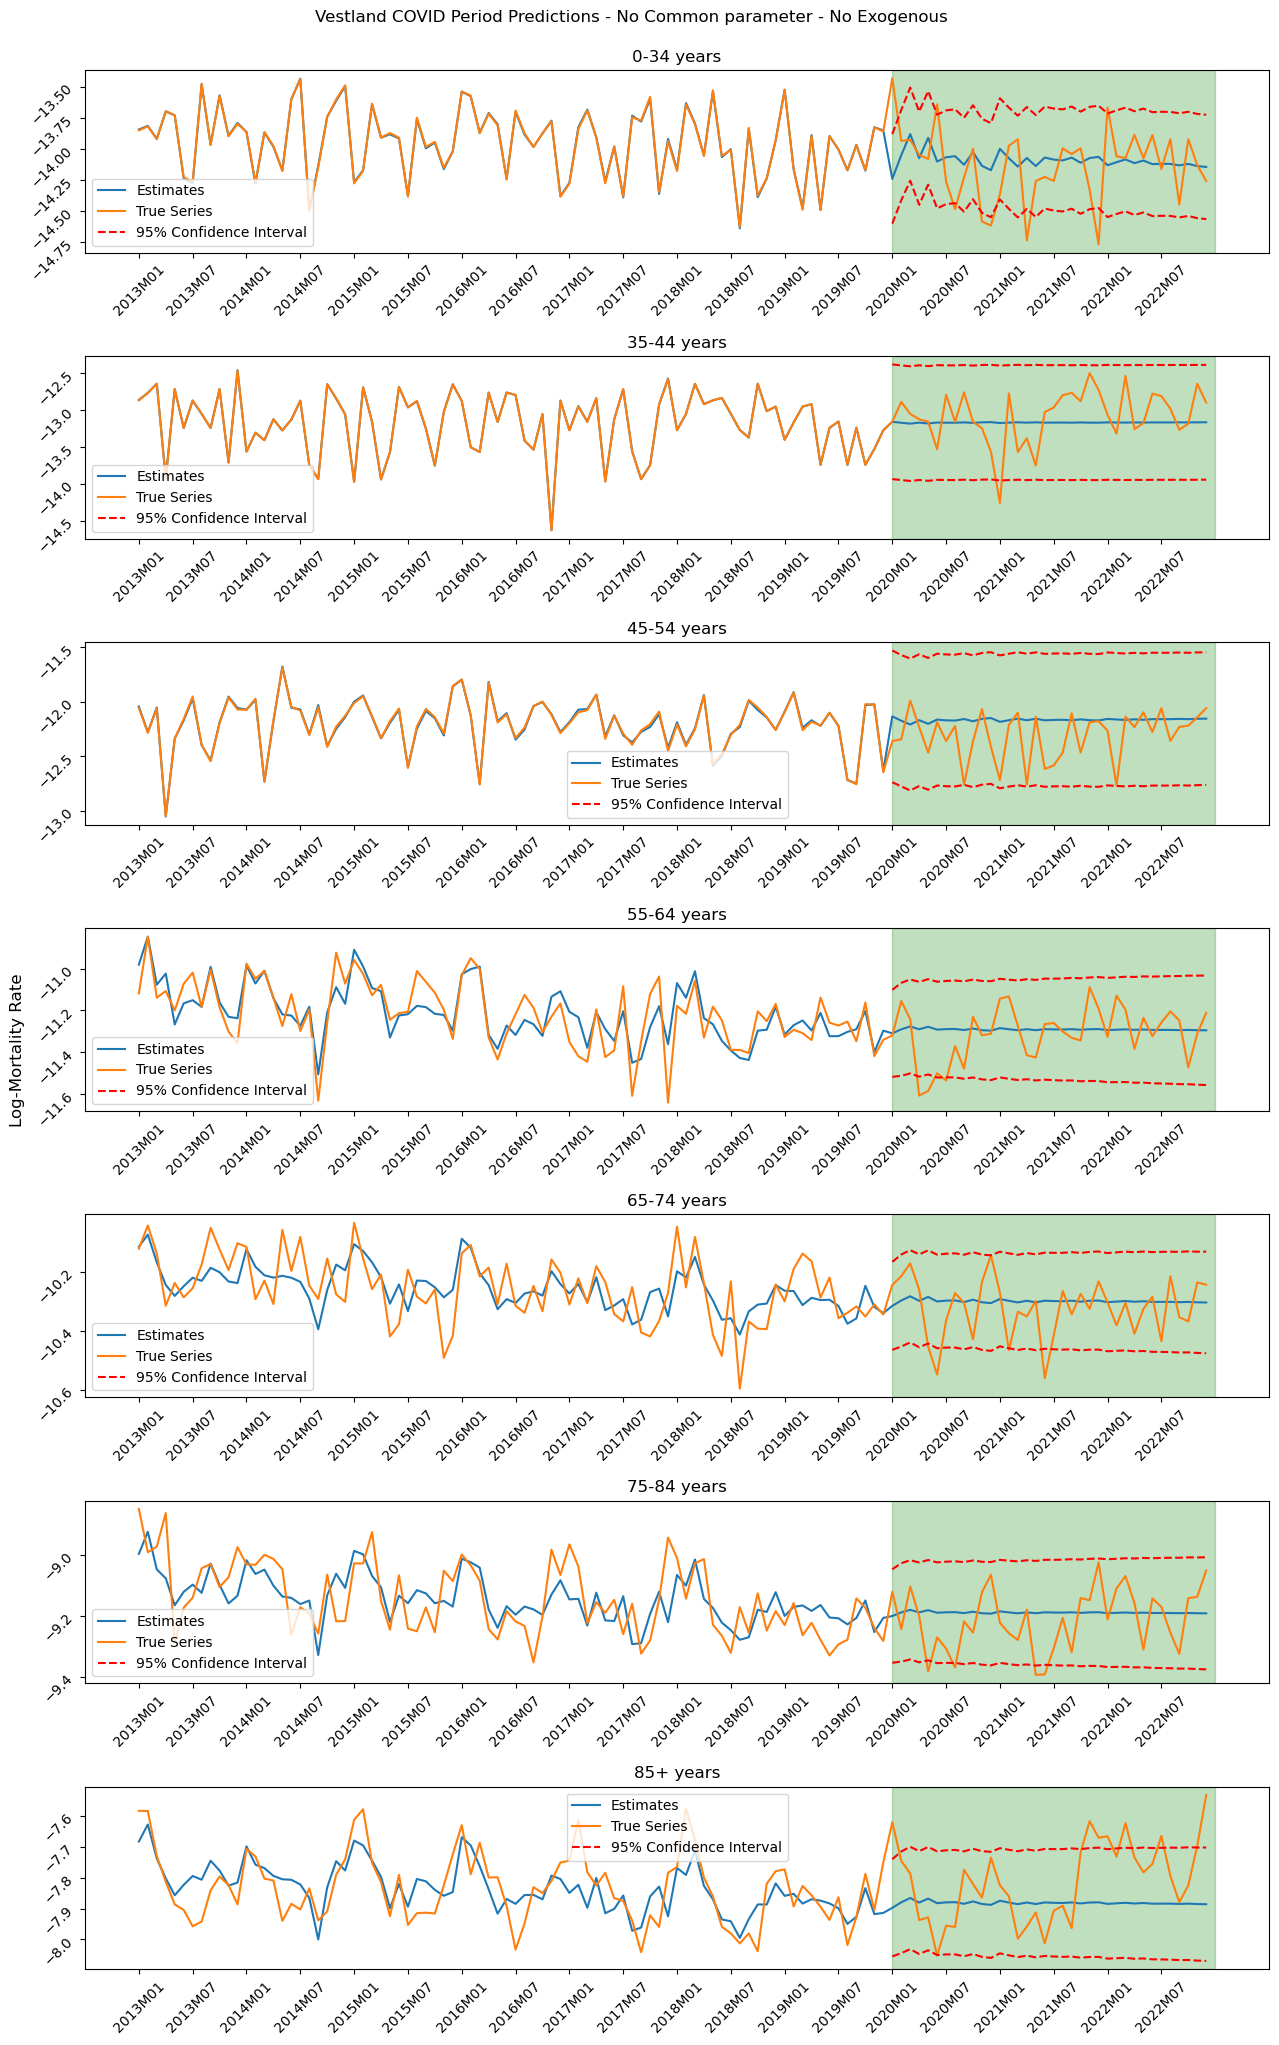

In [100]:
## Model No Common parameter - No Exogenous
a_xi,b_xs,k_ts,regional_re_est,k_t_models,k_t_preds,regional_predictions_nocommoutCOVID,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,D = model_no_common(vestland_logmort_incCOVID,regional_terms = 4,prediction_period = 36,train_period = 84,region_deaths = vestland_death_COVID,region_pop = vestland_pop_COVID,re_est = False,smooth = False)

#exogenous_train = exog_train_vestland,exogenous_test = exog_test_vestland
regional_predictions_nocommoutCOVID = pd.DataFrame(regional_predictions_nocommoutCOVID)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_nocommoutCOVID.index = vestland_logmort_incCOVID.index
regional_predictions_nocommoutCOVID.columns = vestland_logmort_incCOVID.columns
regional_predictions_upconf.index = vestland_logmort_incCOVID.index
regional_predictions_upconf.columns = vestland_logmort_incCOVID.columns
regional_predictions_lowconf.index = vestland_logmort_incCOVID.index
regional_predictions_lowconf.columns = vestland_logmort_incCOVID.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_nocommoutCOVID.iloc[:,:84],vestland_logmort_incCOVID.iloc[:,:84])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_nocommoutCOVID.iloc[:,84:],vestland_logmort_incCOVID.iloc[:,84:])))
#print(k_t_models["model_0"].summary())

##vestland_pop_inCOVID = undo_person_days(pd.DataFrame(vestland_pop_inCOVID,columns = vestland_logmort_incCOVID.columns[-36:]))

exp_term = np.multiply(np.exp(a_xi+b_xs@np.diag(D)[:4,:4]@k_t_preds[:,84:]),vestland_pop_inCOVID) ### Add scaling of singular values
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(vestland_death_inCOVID,axis = 1)

error_NoCom_woutCOVID = MAPE(regional_predictions_nocommoutCOVID.iloc[:,84:],vestland_logmort_incCOVID.iloc[:,84:])
prediction_plots(regional_predictions_nocommoutCOVID,regional_predictions_upconf,regional_predictions_lowconf,36,vestland_logmort_incCOVID,suptitle = "Vestland COVID Period Predictions - No Common parameter - No Exogenous ")



In [88]:
vestland_pop_inCOVID

2020M01        2020M02        2020M03    2020M04        2020M05  \
0  505436.0  505211.000000  504986.000000  504761.00  504536.000000   
1  149753.0  149819.833333  149886.666667  149953.50  150020.333333   
2  150337.0  150368.916667  150400.833333  150432.75  150464.666667   
3  127631.0  127770.083333  127909.166667  128048.25  128187.333333   
4  103494.0  103639.250000  103784.500000  103929.75  104075.000000   
5   55705.0   55961.750000   56218.500000   56475.25   56732.000000   
6   24067.0   24072.416667   24077.833333   24083.25   24088.666667   

         2020M06   2020M07        2020M08        2020M09    2020M10  ...  \
0  504311.000000  504086.0  503861.000000  503636.000000  503411.00  ...   
1  150087.166667  150154.0  150220.833333  150287.666667  150354.50  ...   
2  150496.583333  150528.5  150560.416667  150592.333333  150624.25  ...   
3  128326.416667  128465.5  128604.583333  128743.666667  128882.75  ...   
4  104220.250000  104365.5  104510.750000  104656.000000  104801.25  ...   
5   56988.750000   57245.5   57502.250000   57759.000000   58015.75  ...   
6   24094.083333   24099.5   24104.916667   24110.333333   24115.75  ...   

         2022M03    2022M04        2022M05        2022M06   2022M07  \
0  501127.000000  501241.50  501356.000000  501470.500000  501585.0   
1  152177.333333  152433.00  152688.666667  152944.333333  153200.0   
2  150323.666667  150299.50  150275.333333  150251.166667  150227.0   
3  131584.333333  131806.50  132028.666667  132250.833333  132473.0   
4  106118.166667  106222.25  106326.333333  106430.416667  106534.5   
5   63260.166667   63558.75   63857.333333   64155.916667   64454.5   
6   24409.333333   24394.00   24378.666667   24363.333333   24348.0   

         2022M08        2022M09    2022M10        2022M11        2022M12  
0  501699.500000  501814.000000  501928.50  502043.000000  502157.500000  
1  153455.666667  153711.333333  153967.00  154222.666667  154478.333333  
2  150202.833333  150178.666667  150154.50  150130.333333  150106.166667  
3  132695.166667  132917.333333  133139.50  133361.666667  133583.833333  
4  106638.583333  106742.666667  106846.75  106950.833333  107054.916667  
5   64753.083333   65051.666667   65350.25   65648.833333   65947.416667  
6   24332.666667   24317.333333   24302.00   24286.666667   24271.333333  

[7 rows x 36 columns]

In [101]:
vestland_NoCom_NoExog_deaths_20 = pd.DataFrame(exp_term).iloc[:,:6].sum(axis = 1) #only first half of 2020
vestland_NoCom_NoExog_deaths_20_21 = epi_year(pd.DataFrame(exp_term))["year_0"].sum(axis = 1)
vestland_NoCom_NoExog_deaths_21_22 = epi_year(pd.DataFrame(exp_term))["year_1"].sum(axis = 1)
vestland_NoCom_NoExog_deaths_22 = epi_year(pd.DataFrame(exp_term))["year_2"].sum(axis = 1)

p_value k_t0 before re-estimation: 0.970829771858083 

Regional k_t0 is white noise with LB p_value 0.970829771858083 

p_value k_t1 before re-estimation: 0.2704096147230933 

Regional k_t1 is white noise with LB p_value 0.2704096147230933 

p_value k_t2 before re-estimation: 0.25303950767681627 

Regional k_t2 is white noise with LB p_value 0.25303950767681627 

p_value k_t3 before re-estimation: 2.1852493262237766e-20 

Proportion of k_t values which are positive[0.42857143 0.55952381 0.48809524 0.52380952] 

Proportion of b_x values which are positive[0.         0.71428571 0.28571429 0.42857143] 

p_value k_t0 after re-estimation: 0.09568208455612652 

Regional k_t0 is white noise with LB p_value 0.09568208455612652 

p_value k_t1 after re-estimation: 0.7675545472541051 

Regional k_t1 is white noise with LB p_value 0.7675545472541051 

p_value k_t2 after re-estimation: 0.6470034839402973 

Regional k_t2 is white noise with LB p_value 0.6470034839402973 

p_value k_t3 after re-estim

<Figure size 640x480 with 0 Axes>

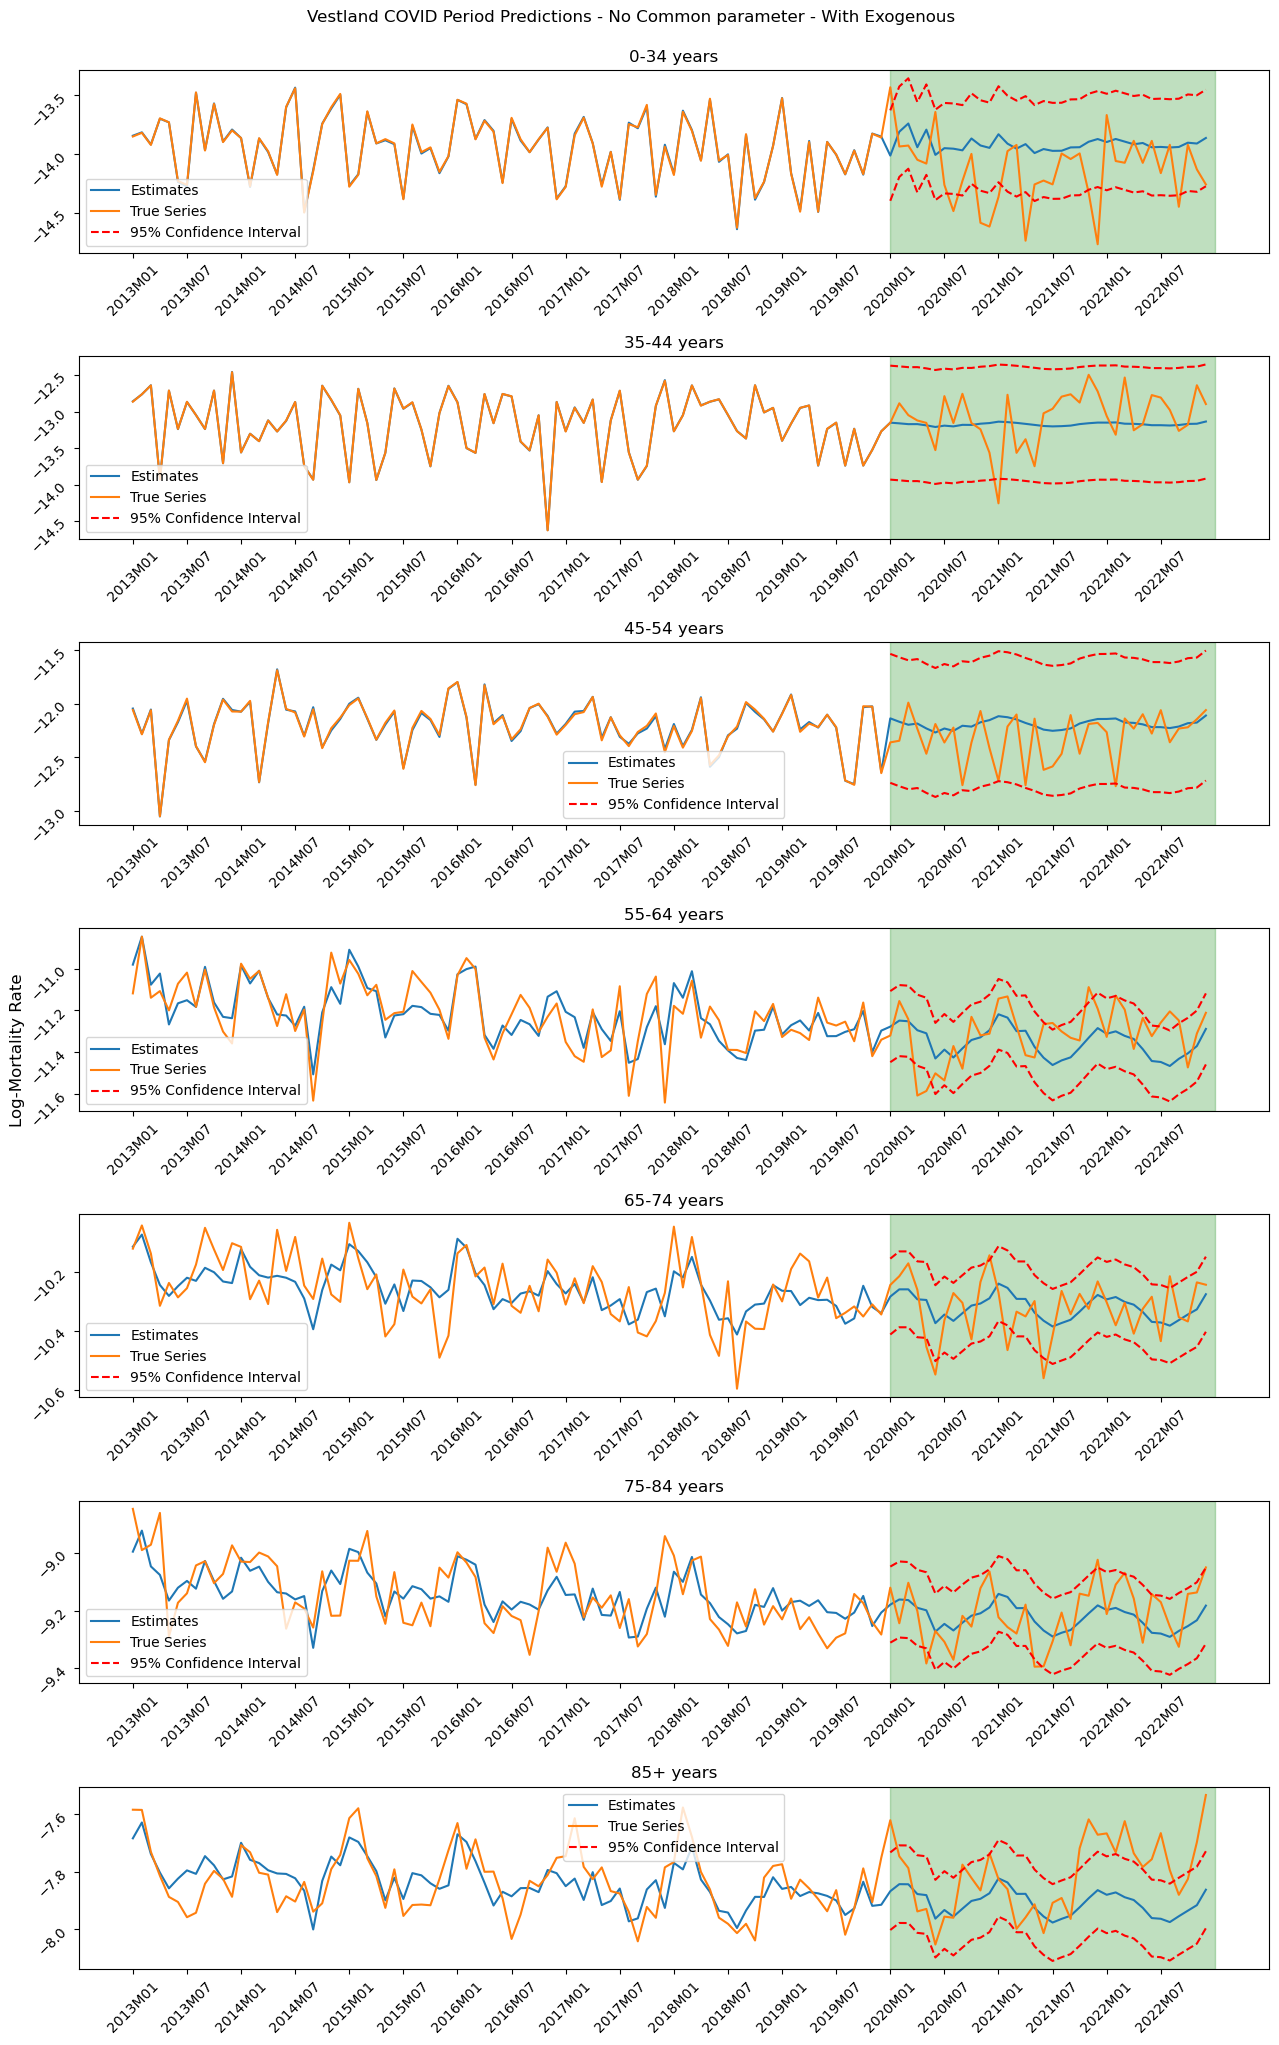

In [108]:
## Model No nocommon parameter - With Exogenous
exog_train_vestland_COVID_2 = exog_train_vestland_COVID.iloc[:,:2]
exog_test_vestland_COVID_2 = exog_test_vestland_COVID.iloc[:,:2]
a_xi,b_xs,k_ts,regional_re_est,k_t_models,k_t_preds,regional_predictions_nocommwithCOVID,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,D = model_no_common(vestland_logmort_incCOVID,regional_terms = 4,prediction_period = 36,train_period = 84,exogenous_train = exog_train_vestland_COVID_2,exogenous_test = exog_test_vestland_COVID_2,region_deaths = vestland_death_COVID,region_pop = vestland_pop_COVID,re_est = False,smooth = False)

#exogenous_train = exog_train_vestland,exogenous_test = exog_test_vestland
regional_predictions_nocommwithCOVID = pd.DataFrame(regional_predictions_nocommwithCOVID)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_nocommwithCOVID.index = vestland_logmort_incCOVID.index
regional_predictions_nocommwithCOVID.columns = vestland_logmort_incCOVID.columns
regional_predictions_upconf.index = vestland_logmort_incCOVID.index
regional_predictions_upconf.columns = vestland_logmort_incCOVID.columns
regional_predictions_lowconf.index = vestland_logmort_incCOVID.index
regional_predictions_lowconf.columns = vestland_logmort_incCOVID.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_nocommwithCOVID.iloc[:,:84],vestland_logmort_incCOVID.iloc[:,:84])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_nocommwithCOVID.iloc[:,84:],vestland_logmort_incCOVID.iloc[:,84:])))
#print(k_t_models["model_0"].summary())

#vestland_pop_inCOVID = undo_person_days(pd.DataFrame(vestland_pop_inCOVID,columns = vestland_logmort_incCOVID.columns[-36:]))

exp_term = np.multiply(np.exp(a_xi+ b_xs@np.diag(D)[:4,:4]@k_t_preds[:,84:]),vestland_pop_inCOVID) ### Add scaling of singular values
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(vestland_death_inCOVID,axis = 1)



error_NoCom_withCOVID = MAPE(regional_predictions_nocommwithCOVID.iloc[:,84:],vestland_logmort_incCOVID.iloc[:,84:])
prediction_plots(regional_predictions_nocommwithCOVID,regional_predictions_upconf,regional_predictions_lowconf,36,vestland_logmort_incCOVID,suptitle = "Vestland COVID Period Predictions - No Common parameter - With Exogenous ")



In [103]:
vestland_NoCom_WithExog_deaths_20 = pd.DataFrame(exp_term).iloc[:,:6].sum(axis = 1) #only first half of 2020
vestland_NoCom_WithExog_deaths_20_21 = epi_year(pd.DataFrame(exp_term))["year_0"].sum(axis = 1)
vestland_NoCom_WithExog_deaths_21_22 = epi_year(pd.DataFrame(exp_term))["year_1"].sum(axis = 1)
vestland_NoCom_WithExog_deaths_22 = epi_year(pd.DataFrame(exp_term))["year_2"].sum(axis = 1)

p_value k_t0 before re-estimation: 1.9328187721226587e-08 

p_value k_t0 after re-estimation: 1.932818772122631e-08 

Model Error 8.394377553971704
Re_estimation error Each Age Group (MAPE): [1.548932   2.088611   1.42516549 1.01718082 0.73357652 0.687526
 0.75620142]

 Prediction Error Each Age Group (MAPE)[1.73248555 3.70170086 1.56157979 0.89227399 0.69185004 0.99428859
 1.88318603]

Predicted number of deaths for COVID period 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
dtype: float64
Actual number of deaths for COVID period [  420   367   761  1765  3814  6685 10860]
Actual deaths over predicted deaths 0    inf
1    inf
2    inf
3    inf
4    inf
5    inf
6    inf
dtype: float64
Total Excess Mortality (Actual - Predicted): -24672.0
Excess Mortality Ratio (Actual/Predicted): 0.0


<Figure size 640x480 with 0 Axes>

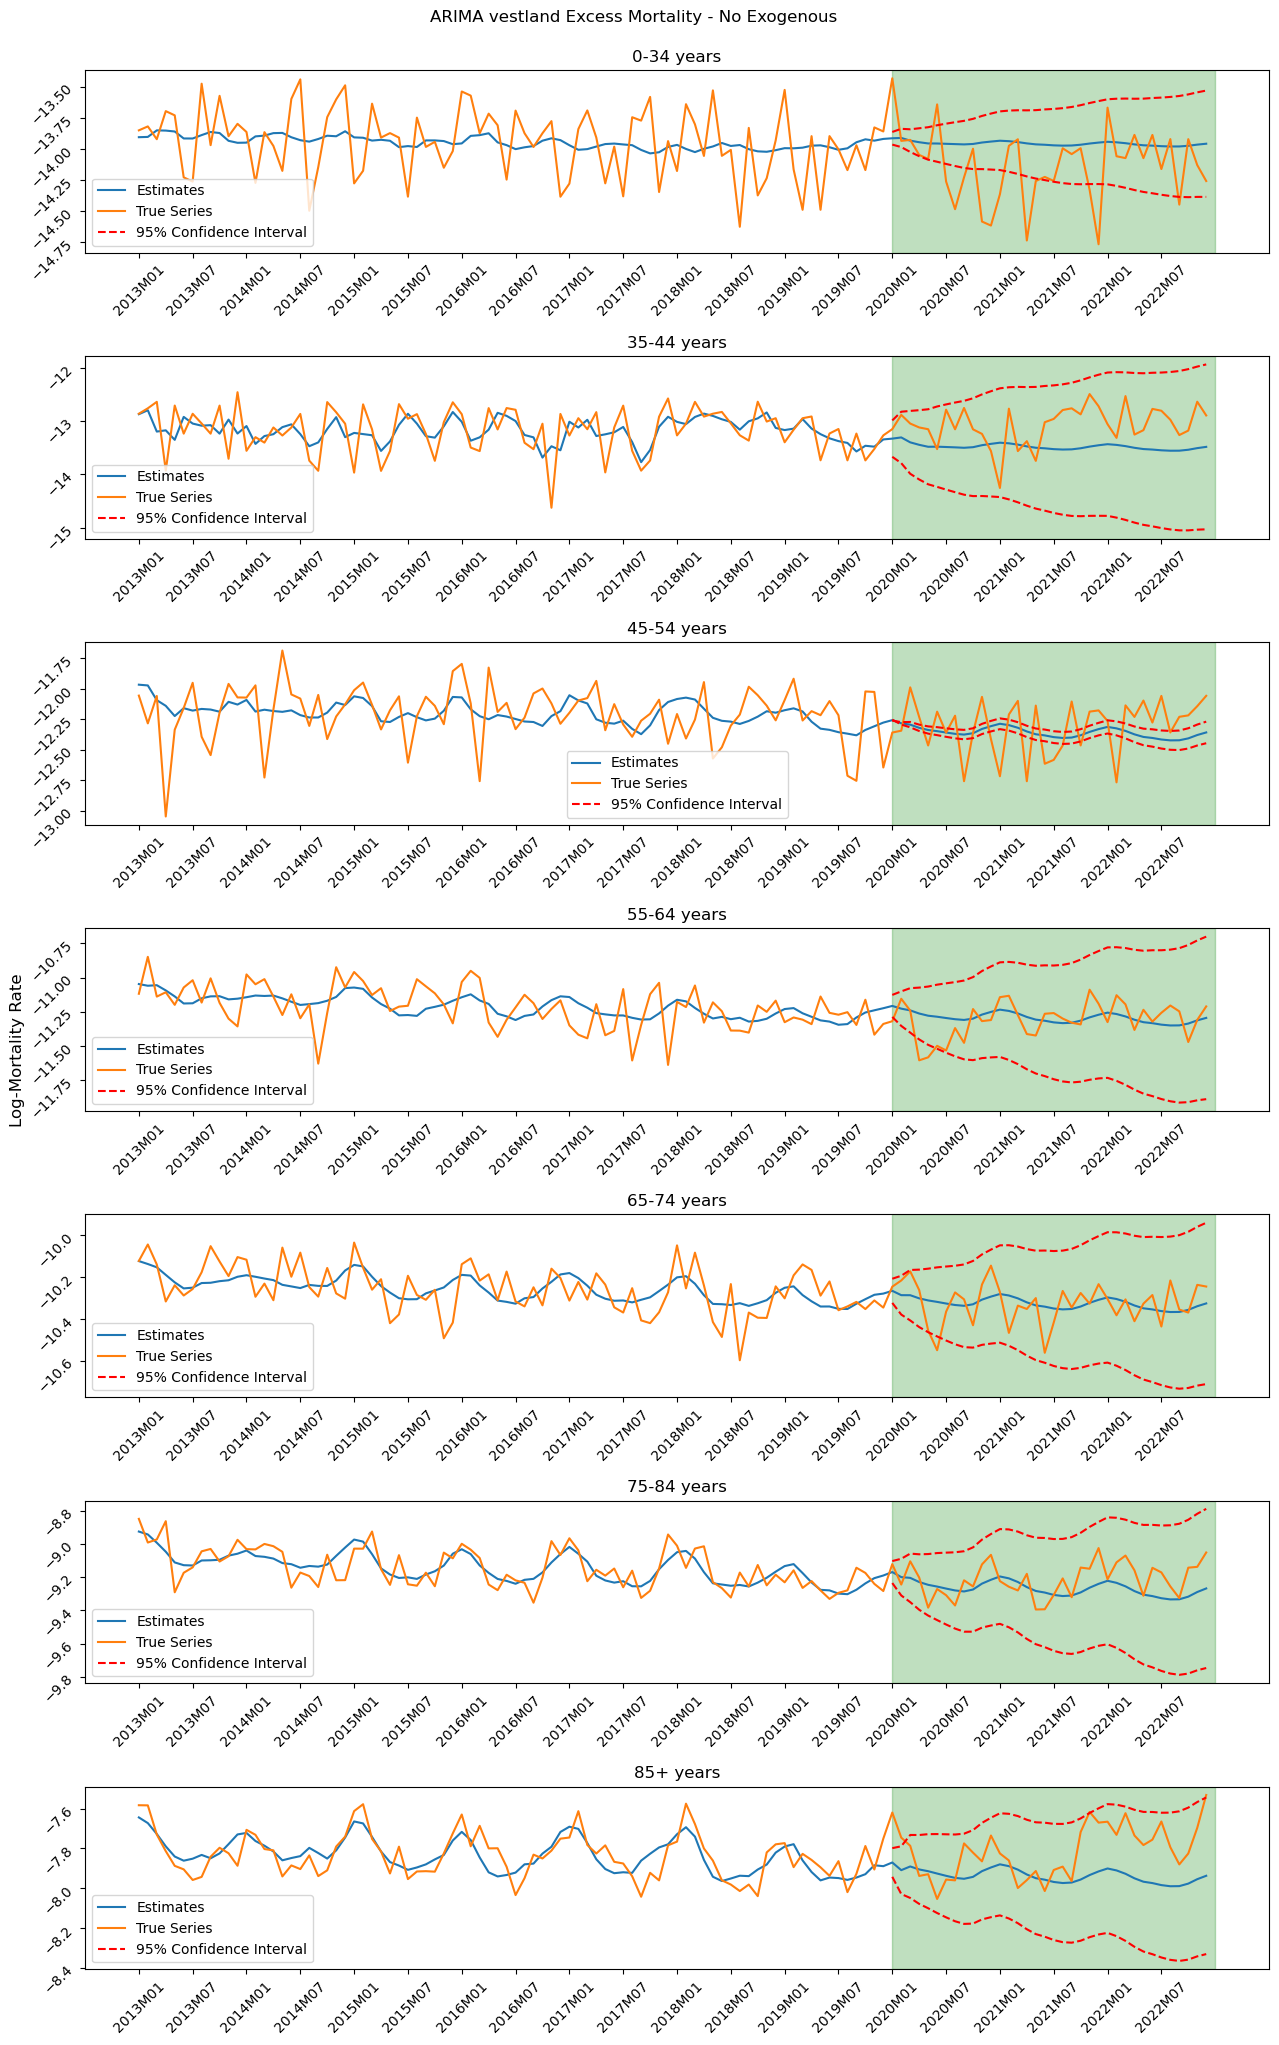

In [92]:
### Without Exogenous 2 common 4 regional 
### Without Exogenous
a_xi,B_xs,K_ts,b_xs,k_ts,country_re_est,regional_re_est,K_t_models,k_t_models_sarout,K_t_preds,k_t_preds,regional_predictions_saroutCOVID,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_,_ = full_model(all_nor_logmort_incCOVID,vestland_logmort_incCOVID, common_terms = 2,regional_terms = 1,prediction_period = 36,train_period = 84,country_deaths = nor_death_COVID, country_pop = nor_pop_COVID,region_deaths = vestland_death_COVID,region_pop = vestland_pop_COVID,re_est = False,smooth = True)  


regional_predictions_saroutCOVID = pd.DataFrame(regional_predictions_saroutCOVID)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_saroutCOVID.index = vestland_logmort_incCOVID.index
regional_predictions_saroutCOVID.columns = vestland_logmort_incCOVID.columns
regional_predictions_upconf.index = vestland_logmort_incCOVID.index
regional_predictions_upconf.columns = vestland_logmort_incCOVID.columns
regional_predictions_lowconf.index = vestland_logmort_incCOVID.index
regional_predictions_lowconf.columns = vestland_logmort_incCOVID.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_saroutCOVID.iloc[:,:84],vestland_logmort_incCOVID.iloc[:,:84])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_saroutCOVID.iloc[:,84:],vestland_logmort_incCOVID.iloc[:,84:])))

#vestland_pop_inCOVID = undo_person_days(pd.DataFrame(vestland_pop_inCOVID,columns = vestland_logmort_incCOVID.columns[-36:]))

exp_term = np.multiply(np.exp(a_xi+B_xs@K_t_preds[:,84:] + b_xs@k_t_preds[:,84:]),vestland_pop_inCOVID)
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(vestland_death_inCOVID,axis = 1)
print("\nPredicted number of deaths for COVID period " + str(pred_total_deaths))
print("Actual number of deaths for COVID period " + str(actual_total_deaths))
print("Actual deaths over predicted deaths " +str(actual_total_deaths/pred_total_deaths))
print("Total Excess Mortality (Actual - Predicted): " + str(np.sum(pred_total_deaths) - np.sum(actual_total_deaths)))
print("Excess Mortality Ratio (Actual/Predicted): " + str(np.sum(pred_total_deaths)/np.sum(actual_total_deaths)))


regional_predictions_saroutCOVID
error_SARIMAX_woutCOVID = MAPE(regional_predictions_saroutCOVID.iloc[:,84:],vestland_logmort_incCOVID.iloc[:,84:])
prediction_plots(regional_predictions_saroutCOVID,regional_predictions_upconf,regional_predictions_lowconf,36,vestland_logmort_incCOVID,suptitle = "ARIMA vestland Excess Mortality - No Exogenous")


In [81]:
print(str(K_t_models["model_0"].get_params()["order"]) + str(K_t_models["model_0"].get_params()["seasonal_order"]))
print(str(K_t_models["model_1"].get_params()["order"]) + str(K_t_models["model_1"].get_params()["seasonal_order"]))
print("-")
print(str(k_t_models_sarout["model_0"].get_params()["order"]) + str(k_t_models_sarout["model_0"].get_params()["seasonal_order"]))
print(str(k_t_models_sarout["model_1"].get_params()["order"]) + str(k_t_models_sarout["model_1"].get_params()["seasonal_order"]))
print(str(k_t_models_sarout["model_2"].get_params()["order"]) + str(k_t_models_sarout["model_2"].get_params()["seasonal_order"]))
print(str(k_t_models_sarout["model_3"].get_params()["order"]) + str(k_t_models_sarout["model_3"].get_params()["seasonal_order"]))



(1, 1, 1)(2, 0, 1, 12)
(2, 1, 0)(1, 0, 2, 12)
-
(0, 0, 0)(0, 0, 0, 12)
(0, 0, 1)(1, 0, 1, 12)
(3, 1, 2)(0, 0, 0, 12)
(0, 0, 0)(1, 0, 0, 12)


p_value k_t0 before re-estimation: 1.4946932692643013e-06 

p_value k_t0 after re-estimation: 1.4946932692643013e-06 

Model Error 7.9410746059893125
Re_estimation error Each Age Group (MAPE): [1.54017801 2.10527427 1.38840258 1.00178498 0.73109678 0.67850534
 0.63710683]

 Prediction Error Each Age Group (MAPE)[1.56823322 3.61840167 1.804247   0.93360723 0.67961968 0.95652832
 1.53211704]

Predicted number of deaths for COVID period 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
dtype: float64
Actual number of deaths for COVID period [  420   367   761  1765  3814  6685 10860]
Actual deaths over predicted deaths 0    inf
1    inf
2    inf
3    inf
4    inf
5    inf
6    inf
dtype: float64
Total Excess Mortality (Actual - Predicted): -24672.0
Excess Mortality Ratio (Actual/Predicted): 0.0


<Figure size 640x480 with 0 Axes>

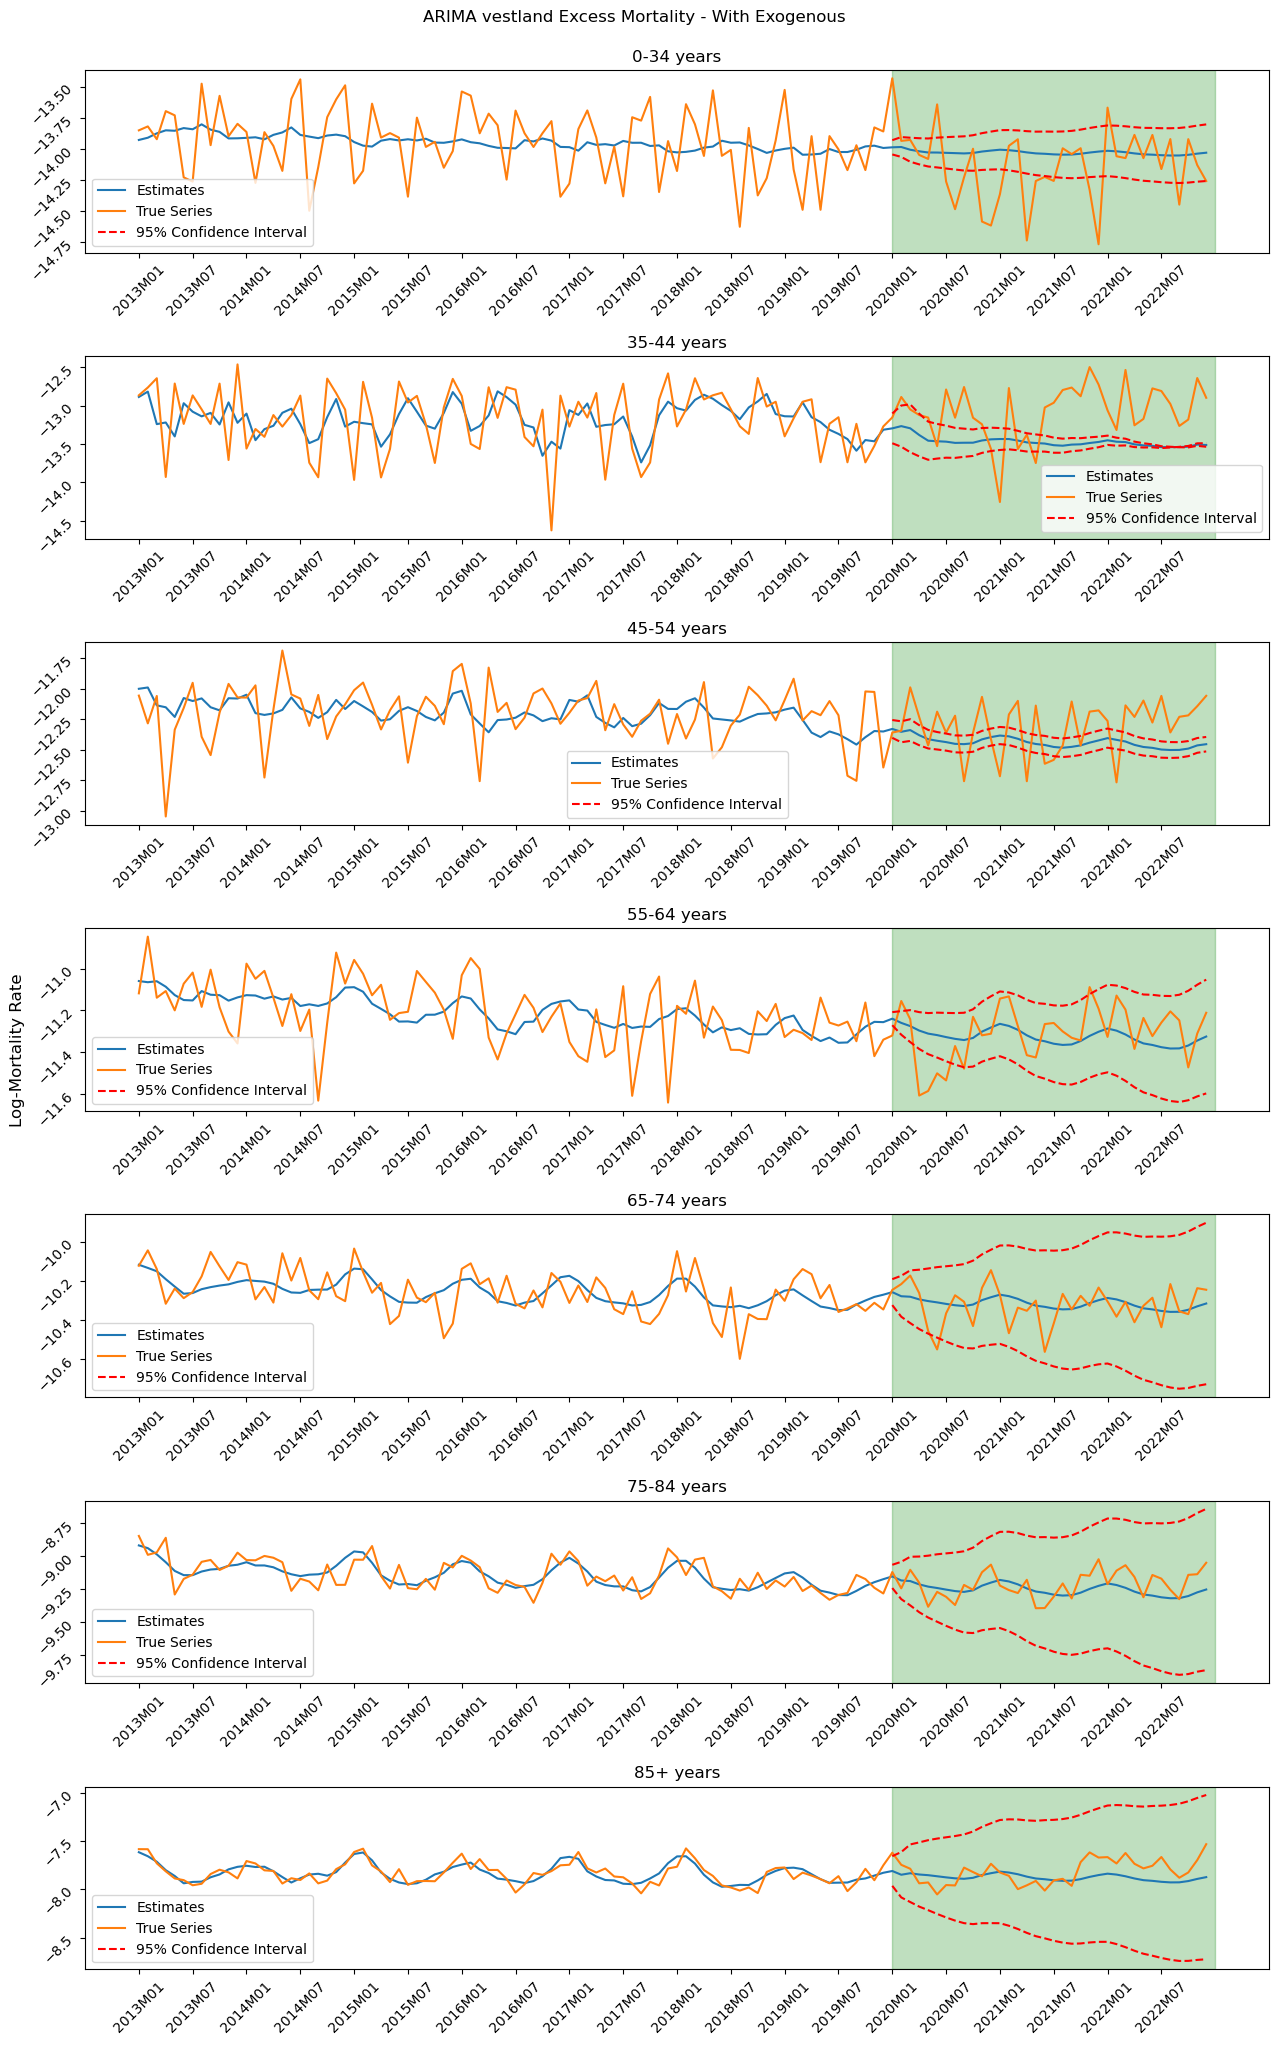

In [93]:
### With Exogenous
a_xi,B_xs,K_ts,b_xs,k_ts,country_re_est,regional_re_est,K_t_models,k_t_models_sarw,K_t_preds,k_t_preds,regional_predictions_sarwithCOVID,regional_predictions_upconf,regional_predictions_lowconf,model_error,res,_,_ = full_model(all_nor_logmort_incCOVID,vestland_logmort_incCOVID, common_terms = 3,regional_terms = 1,prediction_period = 36,train_period = 84,exogenous_train = exog_train_vestland_COVID,exogenous_test = exog_test_vestland_COVID,country_deaths = nor_death_COVID, country_pop = nor_pop_COVID,region_deaths = vestland_death_COVID,region_pop = vestland_pop_COVID,re_est = False,smooth = True)  


regional_predictions_sarwithCOVID = pd.DataFrame(regional_predictions_sarwithCOVID)
regional_predictions_upconf = pd.DataFrame(regional_predictions_upconf)
regional_predictions_lowconf = pd.DataFrame(regional_predictions_lowconf)

regional_predictions_sarwithCOVID.index = vestland_logmort_incCOVID.index
regional_predictions_sarwithCOVID.columns = vestland_logmort_incCOVID.columns
regional_predictions_upconf.index = vestland_logmort_incCOVID.index
regional_predictions_upconf.columns = vestland_logmort_incCOVID.columns
regional_predictions_lowconf.index = vestland_logmort_incCOVID.index
regional_predictions_lowconf.columns = vestland_logmort_incCOVID.columns

print("Model Error " + str(model_error))
print("Re_estimation error Each Age Group (MAPE): "+str(MAPE(regional_predictions_sarwithCOVID.iloc[:,:84],vestland_logmort_incCOVID.iloc[:,:84])))

#AIC_values = [K_t_models["model_0"].aic(),K_t_models["model_1"].aic(),k_t_models["model_0"].aic(),k_t_models["model_1"].aic()]
#print("\n Model AIC Values [K_t1,K_t2,k_t1,k_t2]: \n"+ str(AIC_values))

print("\n Prediction Error Each Age Group (MAPE)" +str(MAPE(regional_predictions_sarwithCOVID.iloc[:,84:],vestland_logmort_incCOVID.iloc[:,84:])))

#vestland_pop_inCOVID = undo_person_days(pd.DataFrame(vestland_pop_inCOVID,columns = vestland_logmort_incCOVID.columns[-36:]))

exp_term = np.multiply(np.exp(a_xi+B_xs@K_t_preds[:,84:] + b_xs@k_t_preds[:,84:]),vestland_pop_inCOVID)
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(vestland_death_inCOVID,axis = 1)
print("\nPredicted number of deaths for COVID period " + str(pred_total_deaths))
print("Actual number of deaths for COVID period " + str(actual_total_deaths))
print("Actual deaths over predicted deaths " +str(actual_total_deaths/pred_total_deaths))
print("Total Excess Mortality (Actual - Predicted): " + str(np.sum(pred_total_deaths) - np.sum(actual_total_deaths)))
print("Excess Mortality Ratio (Actual/Predicted): " + str(np.sum(pred_total_deaths)/np.sum(actual_total_deaths)))


error_SARIMAX_withCOVID = MAPE(regional_predictions_sarwithCOVID.iloc[:,84:],vestland_logmort_incCOVID.iloc[:,84:])
prediction_plots(regional_predictions_sarwithCOVID,regional_predictions_upconf,regional_predictions_lowconf,36,vestland_logmort_incCOVID,suptitle = "ARIMA vestland Excess Mortality - With Exogenous")



In [44]:
print(str(K_t_models["model_0"].get_params()["order"]) + str(K_t_models["model_0"].get_params()["seasonal_order"]))
print("-")
print(str(k_t_models_sarw["model_0"].get_params()["order"]) + str(k_t_models_sarw["model_0"].get_params()["seasonal_order"]))
print(str(k_t_models_sarw["model_1"].get_params()["order"]) + str(k_t_models_sarw["model_1"].get_params()["seasonal_order"]))
print(str(k_t_models_sarw["model_2"].get_params()["order"]) + str(k_t_models_sarw["model_2"].get_params()["seasonal_order"]))



(1, 0, 0)(1, 0, 1, 12)
-
(0, 1, 1)(0, 0, 1, 12)
(0, 1, 1)(0, 0, 0, 12)
(0, 1, 1)(1, 0, 0, 12)


test_errors[1.84396569 2.10601792 1.47664823 1.23483414 1.1865062  1.3192369
 1.39184376]

Predicted number of deaths for COVID period 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
dtype: float64
Actual number of deaths for COVID period [  420   367   761  1765  3814  6685 10860]
Actual deaths over predicted deaths 0    inf
1    inf
2    inf
3    inf
4    inf
5    inf
6    inf
dtype: float64
Total Excess Mortality (Actual - Predicted): -24672.0
Excess Mortality Ratio (Actual/Predicted): 0.0


<Figure size 640x480 with 0 Axes>

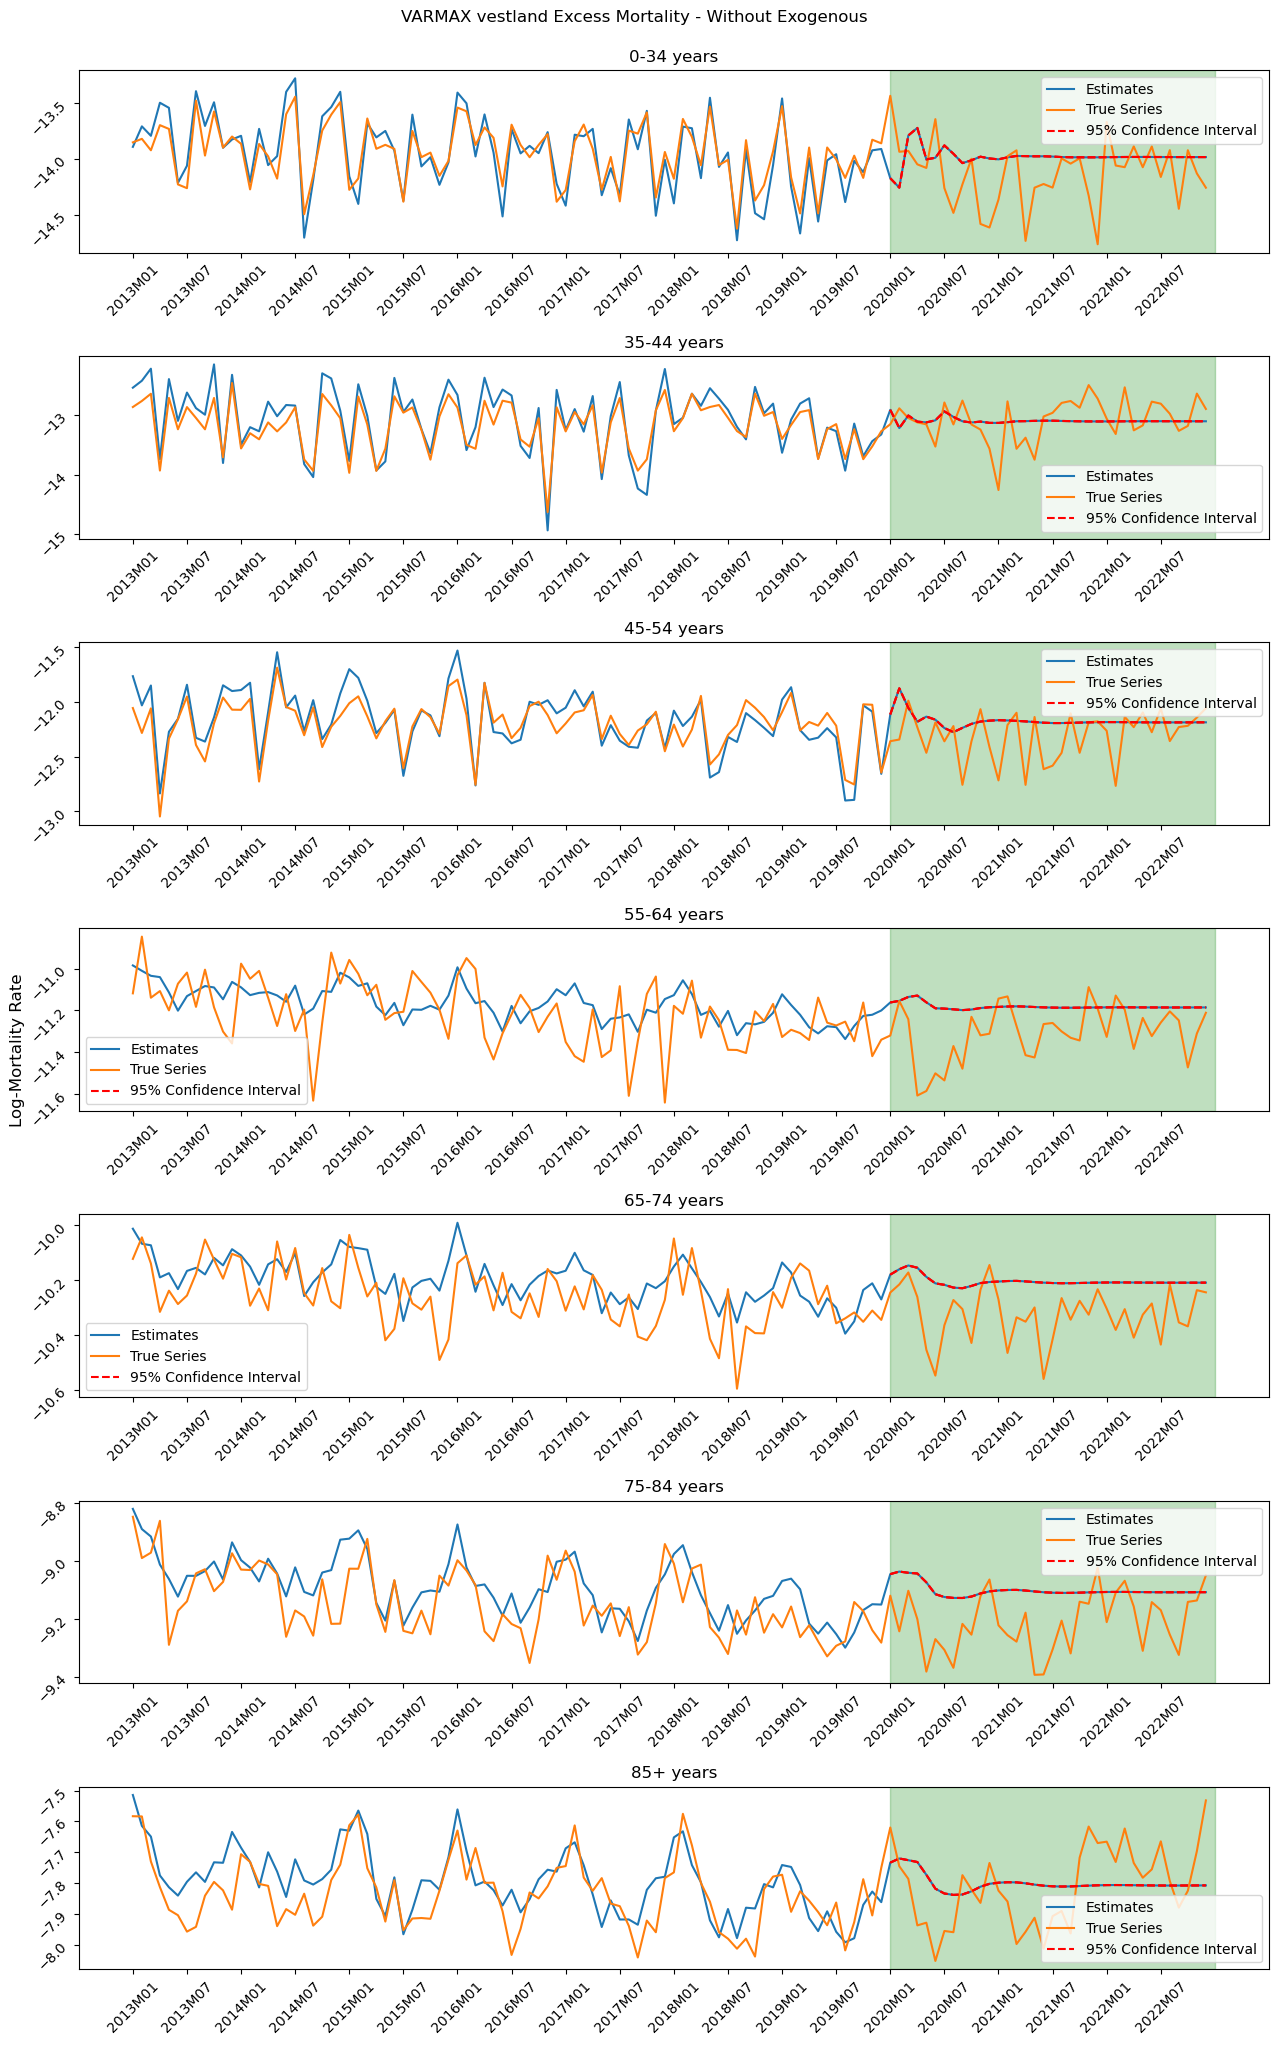

In [76]:
all_k_t, K_ts,k_ts,B_xs,b_xs,a_xi,all_k_preds,predictions_VAR_woutCOVID,predictions_lowconf,predictions_upconf,model_VAR_woutCOVID,aic,error_VAR_woutCOVID,_,_ = VARMAX_model(all_nor_logmort_incCOVID,vestland_logmort_incCOVID, common_terms = 3,regional_terms = 3,prediction_period = 36,train_period = 84,AR= 3,MA = 2, country_deaths = nor_death_COVID,country_pop = nor_pop_COVID,region_deaths = vestland_death_COVID,region_pop = vestland_pop_COVID,re_est = False)


print("test_errors" + str(error_VAR_woutCOVID))

K_t_preds = np.array(all_k_preds.iloc[84:,:3].fillna(method="ffill")).transpose() # change column number to match number of common terms
k_t_preds = np.array(all_k_preds.iloc[84:,3:]).transpose()

##vestland_pop_inCOVID = undo_person_days(pd.DataFrame(vestland_pop_inCOVID,columns = vestland_logmort_incCOVID.columns[-36:]))

exp_term = np.multiply(np.exp(a_xi+B_xs@K_t_preds + b_xs@k_t_preds),vestland_pop_inCOVID)
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(vestland_death_inCOVID,axis = 1)
print("\nPredicted number of deaths for COVID period " + str(pred_total_deaths))
print("Actual number of deaths for COVID period " + str(actual_total_deaths))
print("Actual deaths over predicted deaths " +str(actual_total_deaths/pred_total_deaths))
print("Total Excess Mortality (Actual - Predicted): " + str(np.sum(pred_total_deaths) - np.sum(actual_total_deaths)))
print("Excess Mortality Ratio (Actual/Predicted): " + str(np.sum(pred_total_deaths)/np.sum(actual_total_deaths)))


prediction_plots(predictions_VAR_woutCOVID,predictions_VAR_woutCOVID,predictions_VAR_woutCOVID,36,vestland_logmort_incCOVID,suptitle = "VARMAX vestland Excess Mortality - Without Exogenous")



test_errors[1.15074396 2.01618044 0.71170013 0.6598598  0.62122004 0.88290632
 1.73816717]

Predicted number of deaths for COVID period 0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
dtype: float64
Actual number of deaths for COVID period [  420   367   761  1765  3814  6685 10860]
Actual deaths over predicted deaths 0    inf
1    inf
2    inf
3    inf
4    inf
5    inf
6    inf
dtype: float64


<Figure size 640x480 with 0 Axes>

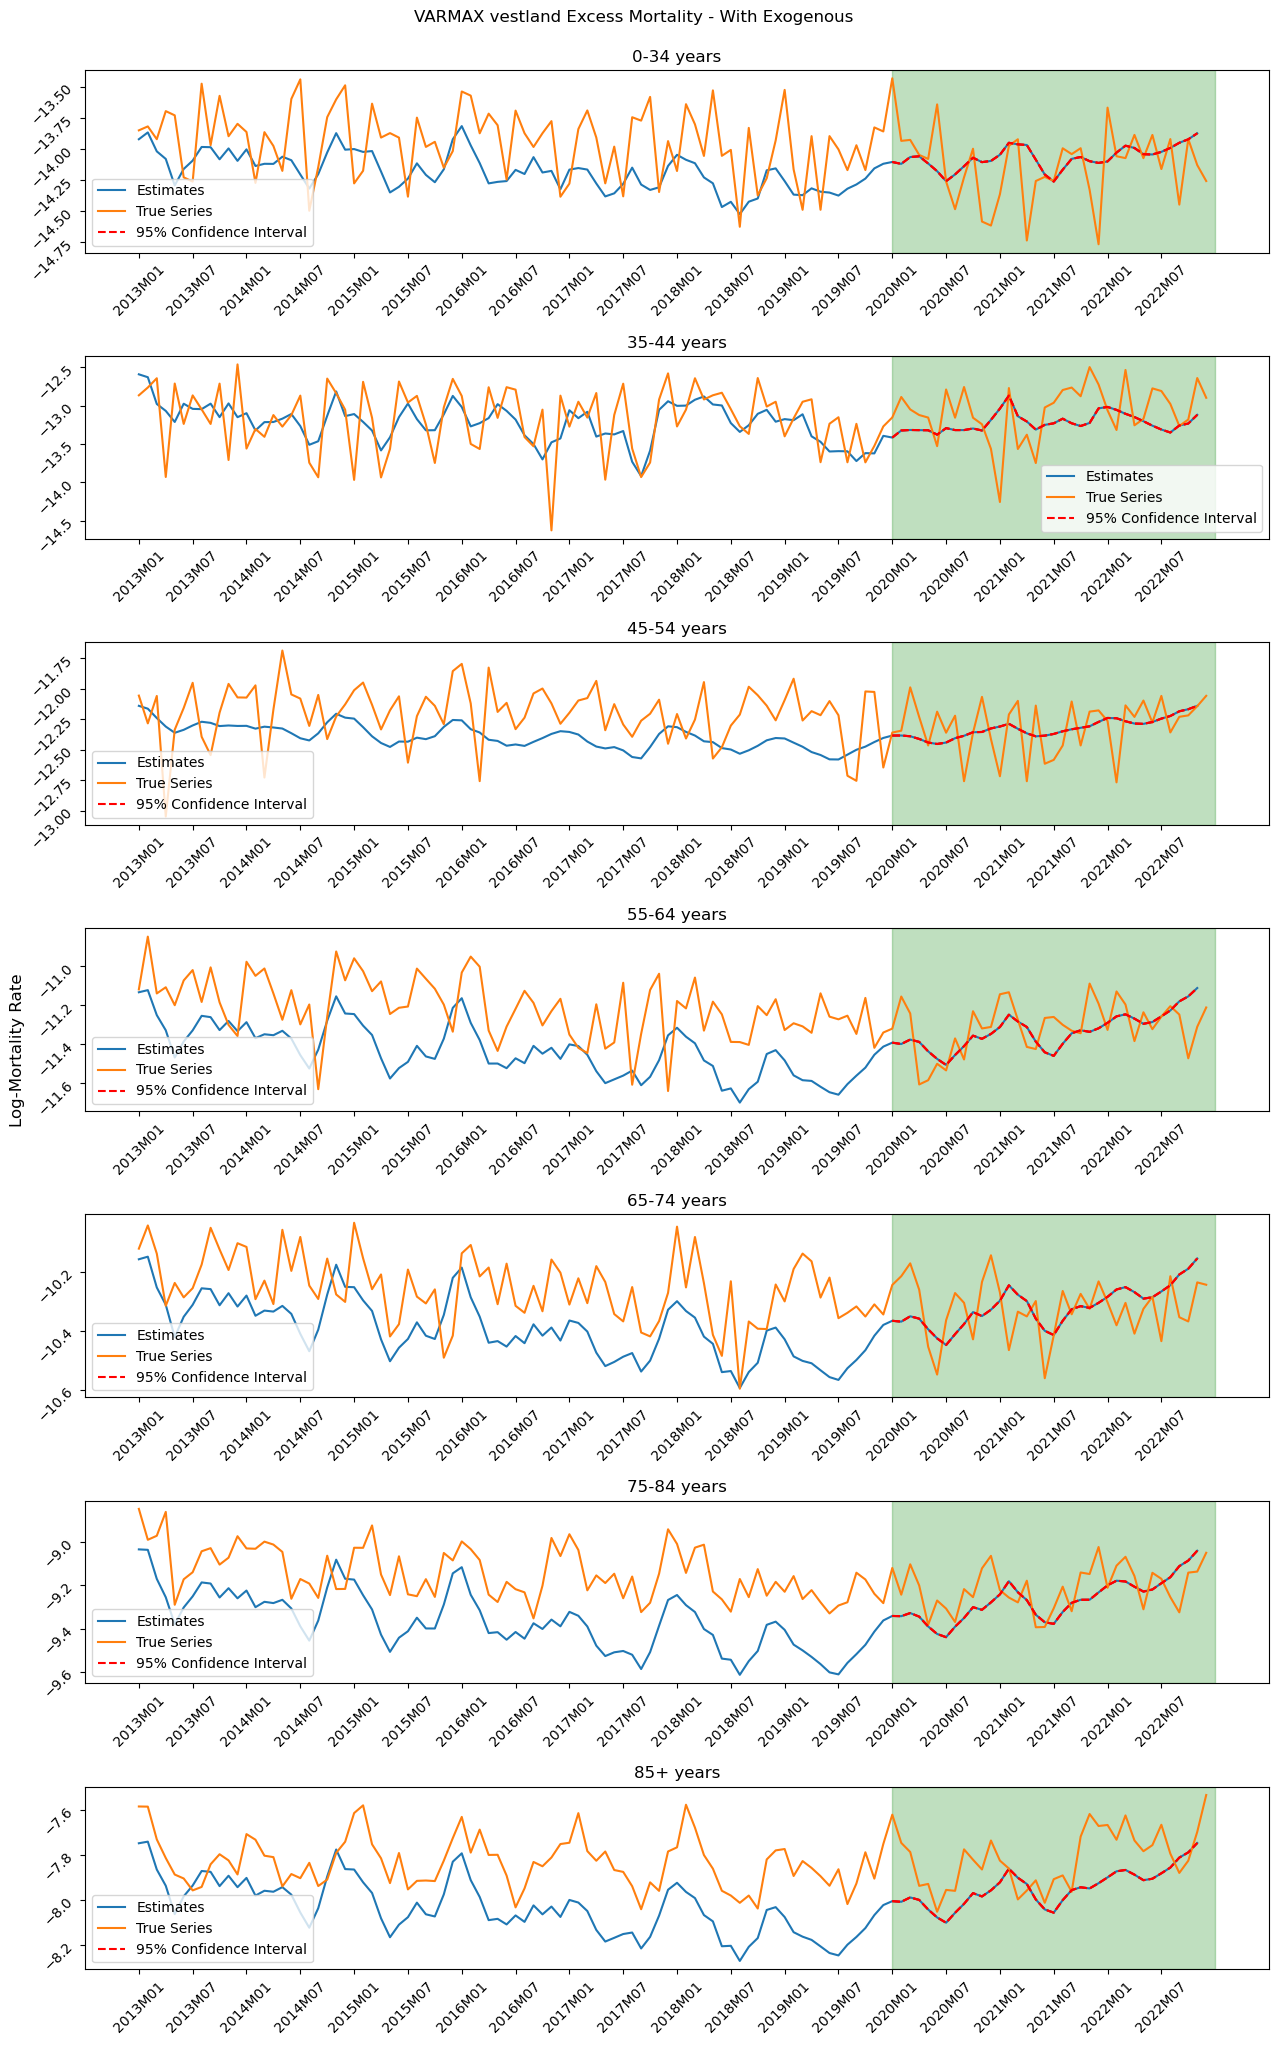

In [77]:
#exog_train_vestland_COVID = lag_exogenous(exog_train_vestland_COVID,numlags = 4)
#exog_test_vestland_COVID = lag_exogenous(exog_test_vestland_COVID,numlags = 4)
all_k_t, K_ts,k_ts,B_xs,b_xs,a_xi,all_k_preds,predictions_VAR_withCOVID,predictions_lowconf,predictions_upconf,model_VAR_withCOVID,aic,error_VAR_withCOVID,_,_ = VARMAX_model(all_nor_logmort_incCOVID,vestland_logmort_incCOVID, common_terms = 1,regional_terms = 2,prediction_period = 36,train_period = 84,AR= 4,MA = 4,exogenous_train = exog_train_vestland_COVID,exogenous_test = exog_test_vestland_COVID,country_deaths = nor_death_COVID, country_pop = nor_pop_COVID,region_deaths = vestland_death_COVID,region_pop = vestland_pop_COVID,re_est = False,smooth = True)


print("test_errors" + str(error_VAR_withCOVID))

K_t_preds = np.array(all_k_preds.iloc[84:,:1].fillna(method="ffill")).transpose()
k_t_preds = np.array(all_k_preds.iloc[84:,1:].fillna(method = "ffill")).transpose()

##vestland_pop_inCOVID = undo_person_days(pd.DataFrame(vestland_pop_inCOVID,columns = vestland_logmort_incCOVID.columns[-36:]))

exp_term = np.multiply(np.exp(a_xi+B_xs@K_t_preds + b_xs@k_t_preds),vestland_pop_inCOVID)
exp_term = np.round(exp_term,0)
pred_total_deaths = np.sum(exp_term,axis = 1)
actual_total_deaths = np.sum(vestland_death_inCOVID,axis = 1)
print("\nPredicted number of deaths for COVID period " + str(pred_total_deaths))
print("Actual number of deaths for COVID period " + str(actual_total_deaths))
print("Actual deaths over predicted deaths " +str(actual_total_deaths/pred_total_deaths))

prediction_plots(predictions_VAR_withCOVID,predictions_VAR_withCOVID,predictions_VAR_withCOVID,36,vestland_logmort_incCOVID,suptitle = "VARMAX vestland Excess Mortality - With Exogenous")


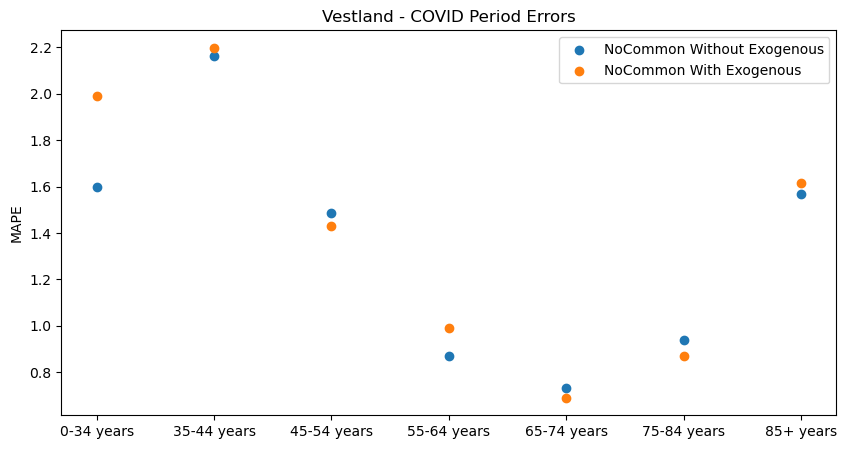

In [78]:
test_errors = np.vstack((error_SARIMAX_woutCOVID,error_SARIMAX_withCOVID,error_VAR_woutCOVID,error_VAR_withCOVID,error_NoCom_woutCOVID,error_NoCom_withCOVID))
vestland = test_errors

age_groups = vestland_logmort.index
plt.figure(figsize = (10,5))
# plt.scatter(age_groups,vestland[0,:],label = "SARIMAX Without Exogenous")
# plt.scatter(age_groups,vestland[1,:],label = "SARIMAX With Exogenous")
# plt.scatter(age_groups,vestland[2,:],label = "VARMAX Without Exogenous")
# plt.scatter(age_groups,vestland[3,:],label = "VARMAX With Exogenous")
plt.scatter(age_groups,vestland[4,:],label = "NoCommon Without Exogenous")
plt.scatter(age_groups,vestland[5,:],label = "NoCommon With Exogenous")
plt.legend();
plt.ylabel("MAPE")
plt.title("Vestland - COVID Period Errors");

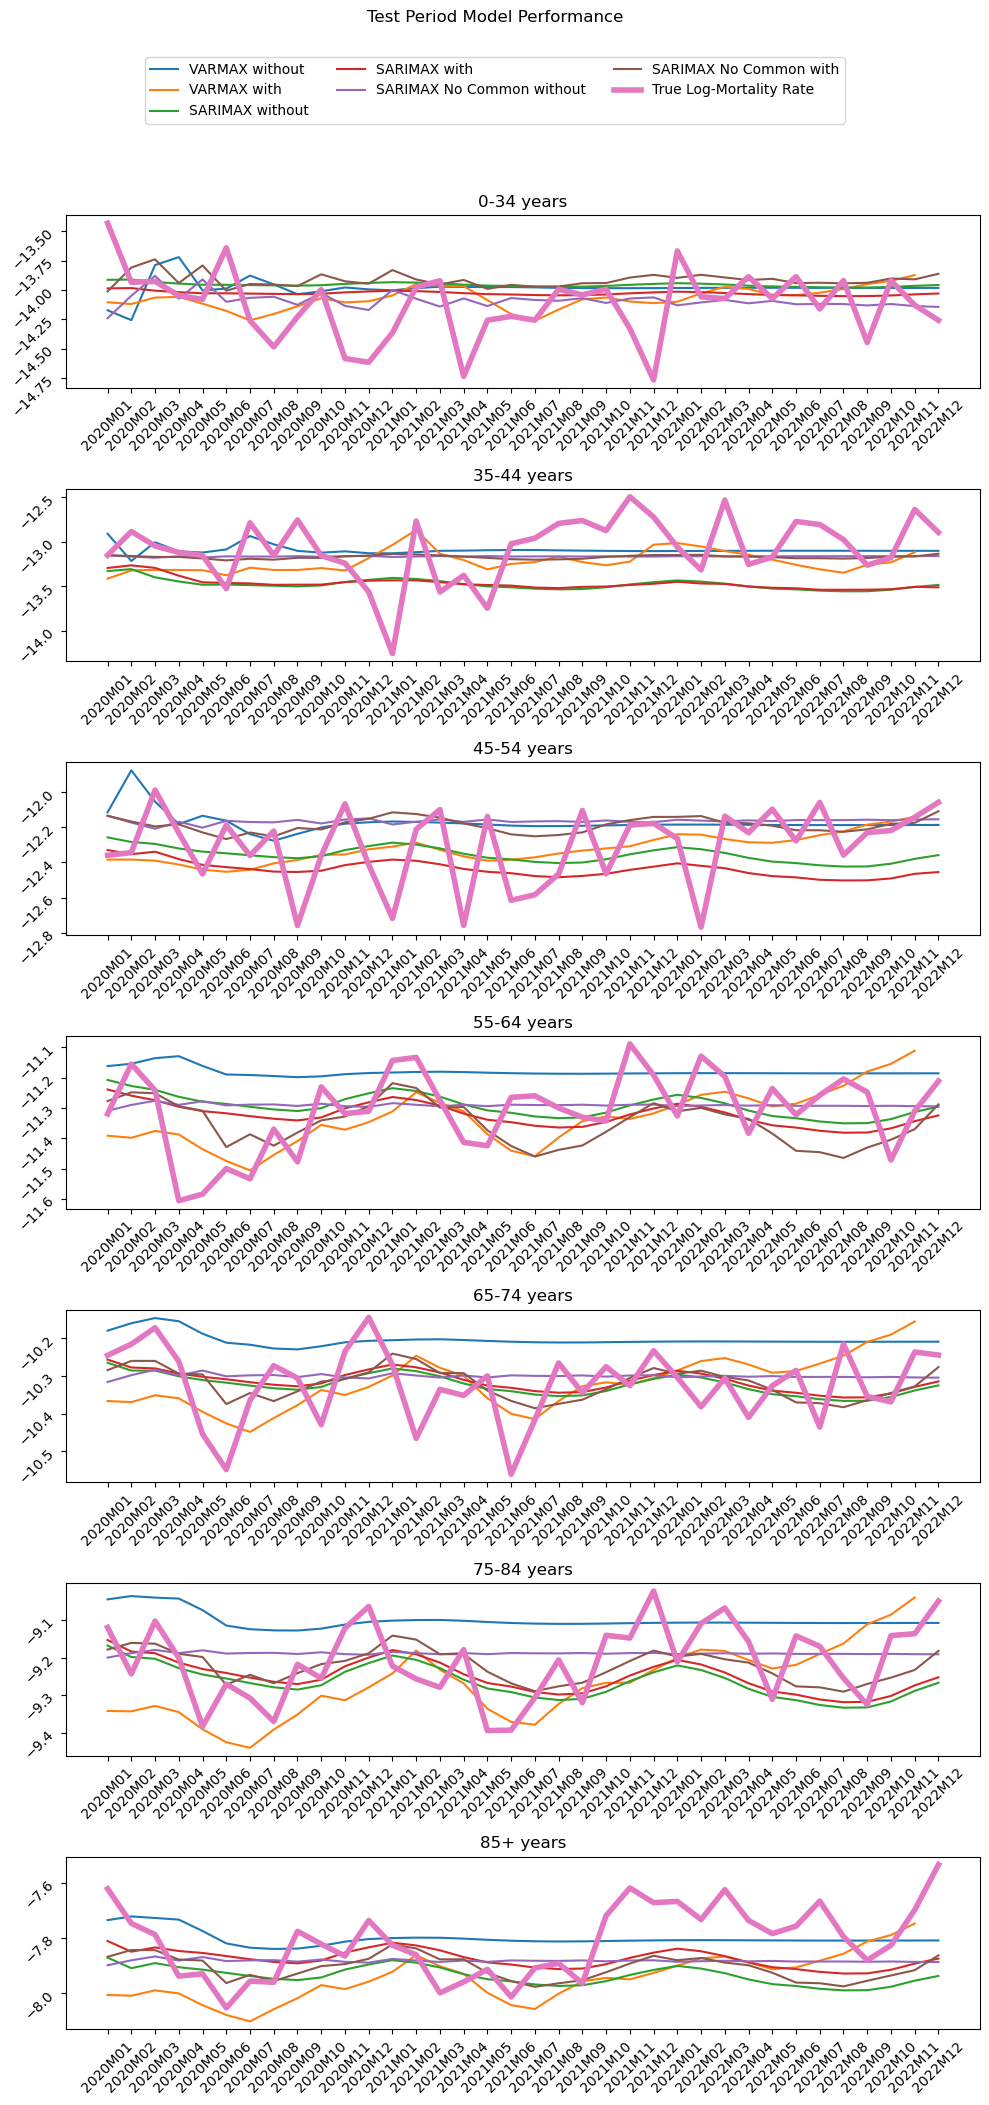

In [79]:
predictions_VAR_withCOVID = pd.DataFrame(predictions_VAR_withCOVID)
predictions_VAR_withCOVID.index = vestland_logmort_incCOVID.index
predictions_VAR_withCOVID.columns = vestland_logmort_incCOVID.columns

predictions_VAR_woutCOVID = pd.DataFrame(predictions_VAR_woutCOVID)
predictions_VAR_woutCOVID.index = vestland_logmort_incCOVID.index
predictions_VAR_woutCOVID.columns = vestland_logmort_incCOVID.columns


age_groups = vestland_logmort.index
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 20))

# Store lines and labels to create a single legend
lines = []
labels = []

for row in range(7):
    age = age_groups[row]
    axes[row].set_title(age)
    
    line1, = axes[row].plot(predictions_VAR_woutCOVID.iloc[row, 84:], label="VARMAX without")
    line2, = axes[row].plot(predictions_VAR_withCOVID.iloc[row, 84:], label="VARMAX with")
    line3, = axes[row].plot(regional_predictions_saroutCOVID.iloc[row, 84:], label="SARIMAX without")
    line4, = axes[row].plot(regional_predictions_sarwithCOVID.iloc[row, 84:], label="SARIMAX with")
    line5, = axes[row].plot(regional_predictions_nocommoutCOVID.iloc[row, 84:], label="SARIMAX No Common without")
    line6, = axes[row].plot(regional_predictions_nocommwithCOVID.iloc[row, 84:], label="SARIMAX No Common with")
    line7, = axes[row].plot(vestland_logmort_incCOVID.iloc[row, 84:], label="True Log-Mortality Rate", linewidth=4)
    
    axes[row].tick_params(rotation=45)
    
    # Collect lines and labels for the legend
    if row == 0:
        lines.extend([line1, line2, line3, line4, line5, line6, line7])
        labels.extend([line.get_label() for line in lines])

# Create a single legend
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=3)
plt.suptitle("Test Period Model Performance", y=1.05)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Note: year 7 is only half an epiyear!  + First 6 months disregarded
Note: year 8 is only half an epiyear!  + First 6 months disregarded


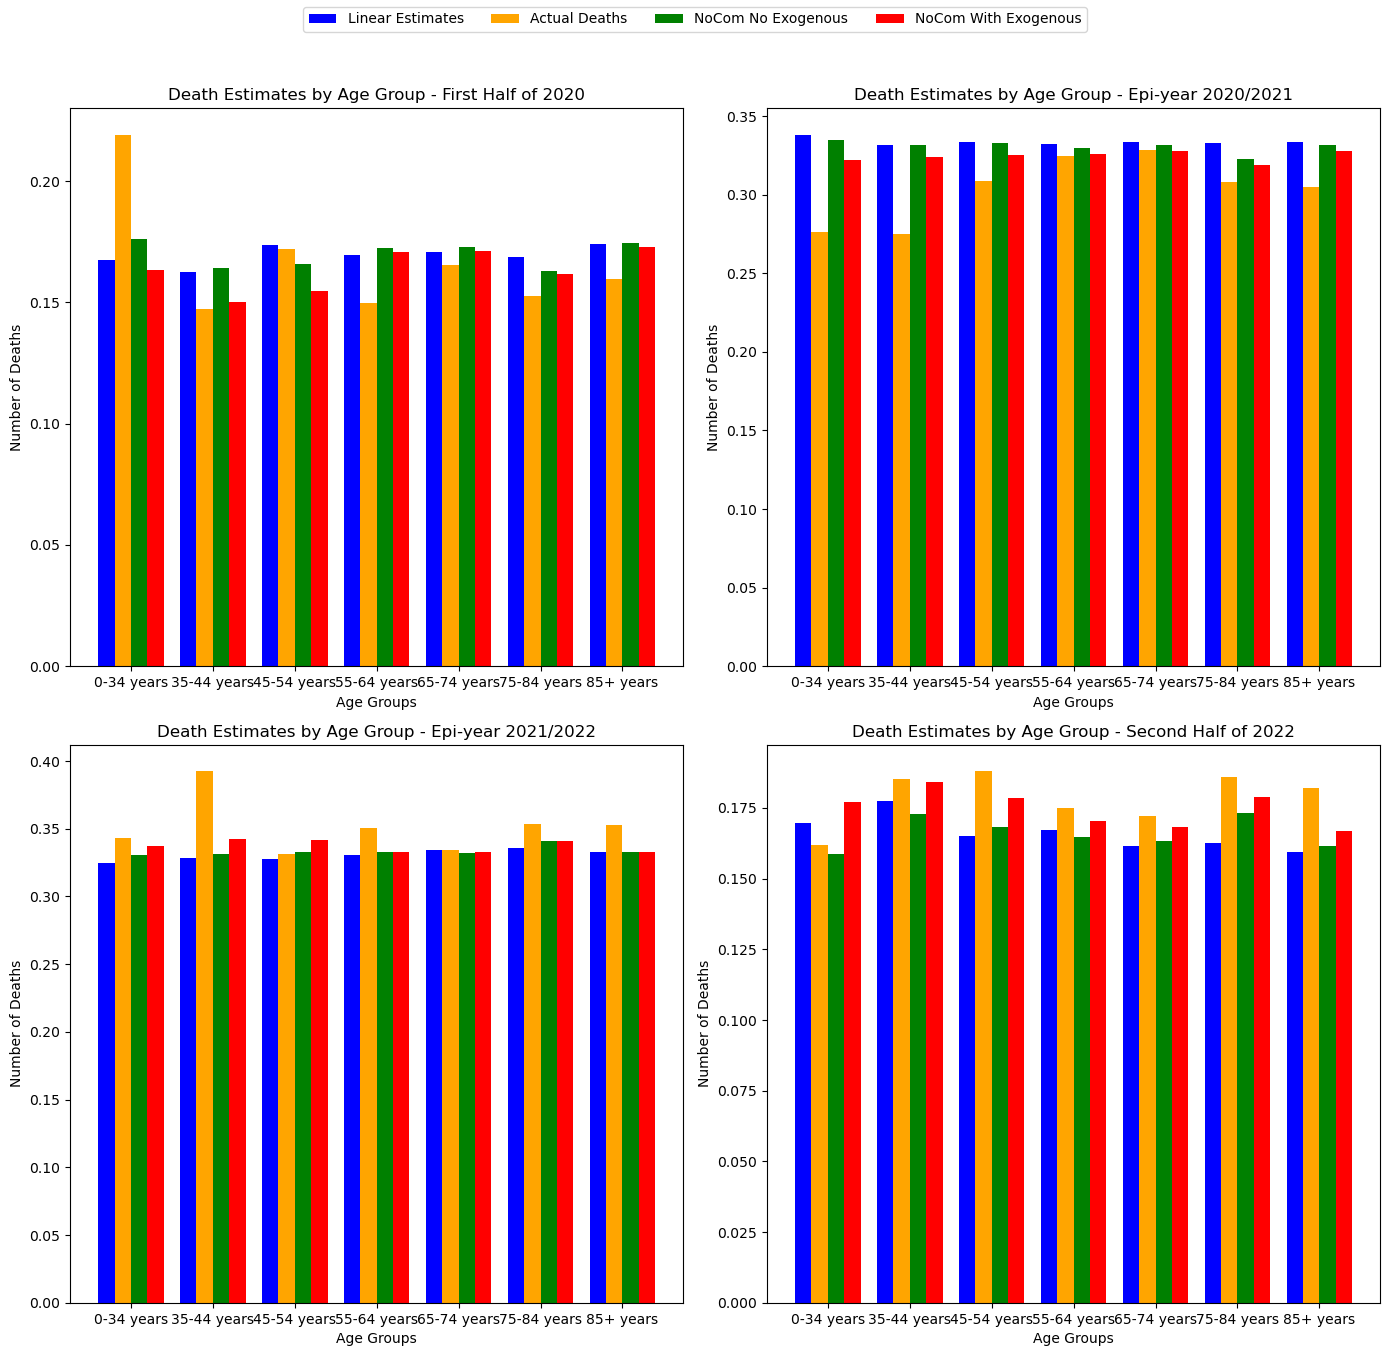

In [104]:
### Compile predictions for excess mortality for epidemic years
lin_ests_20 = np.round(est_half2_epiyear(vestland_death_COVID),0) #estimate for first 6 moths of 2020 ie. second half epi-year 19/20

#Use 2019/20 epi-year in estimate for epi-year 2020/21?  
lin_ests_20_21 = np.reshape(epi_year_lin_ests(pd.DataFrame(vestland_death_full.iloc[:,:96])),(7,))
lin_ests_21_22 = np.reshape(epi_year_lin_ests(pd.DataFrame(vestland_death_full.iloc[:,:108])),(7,))

#estimate for last 6 months of 2022 ie. first half epi-year 19/20
lin_ests_22 = np.round(est_half1_epiyear(vestland_death_COVID),0) #estimate for first 6 moths of 2020 ie. second half epi-year 19/20

# only first half of 2020, second half of epi-year 19/20
vestland_actual_deaths_20 = vestland_death_full.iloc[:,84:90].sum(axis = 1) 
vestland_actual_deaths_20_21 = epi_year(vestland_death_full.iloc[:,84:])["year_0"].sum(axis = 1)
vestland_actual_deaths_21_22 = epi_year(vestland_death_full.iloc[:,84:])["year_1"].sum(axis = 1)
vestland_actual_deaths_22 = epi_year(vestland_death_full.iloc[:,84:])["year_2"].sum(axis = 1) #only second half of 2022 


age_groups = vestland_logmort_full.index
r = np.arange(len(age_groups))
width = 0.2  # Adjusting width to fit four bars

fig, axes = plt.subplots(2, 2, figsize=(14, 14))  # Creating a 2x2 grid of subplots

# Labels for the legends
labels = ["Linear Estimates", "Actual Deaths", "NoCom No Exogenous", "NoCom With Exogenous"]

# Defining data sets for each subplot
data_sets = [
    (lin_ests_20, vestland_actual_deaths_20, vestland_NoCom_NoExog_deaths_20, vestland_NoCom_WithExog_deaths_20),
    (lin_ests_20_21, vestland_actual_deaths_20_21, vestland_NoCom_NoExog_deaths_20_21, vestland_NoCom_WithExog_deaths_20_21),
    (lin_ests_21_22, vestland_actual_deaths_21_22, vestland_NoCom_NoExog_deaths_21_22, vestland_NoCom_WithExog_deaths_21_22),
    (lin_ests_22, vestland_actual_deaths_22, vestland_NoCom_NoExog_deaths_22, vestland_NoCom_WithExog_deaths_22)
]
data_sets = data_sets/np.sum(data_sets,axis = 0)

titles = [
    'Death Estimates by Age Group - First Half of 2020',
    'Death Estimates by Age Group - Epi-year 2020/2021',
    'Death Estimates by Age Group - Epi-year 2021/2022',
    'Death Estimates by Age Group - Second Half of 2022'
]

for ax, data, title in zip(axes.flatten(), data_sets, titles):
    lin_est, actual_death, NoCom_noexog, NoCom_withexog = data
    ax.bar(r - 1.5*width, lin_est, width=width, align="center", color="blue", label=labels[0])
    ax.bar(r - 0.5*width, actual_death, width=width, align="center", color="orange", label=labels[1])
    ax.bar(r + 0.5*width, NoCom_noexog, width=width, align="center", color="green", label=labels[2])
    ax.bar(r + 1.5*width, NoCom_withexog, width=width, align="center", color="red", label=labels[3])
    ax.set_xticks(r)
    ax.set_xticklabels(age_groups)
    ax.set_xlabel('Age Groups')
    ax.set_ylabel('Number of Deaths')
    ax.set_title(title)

# Adding a single legend for the whole figure
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the legend
plt.show()






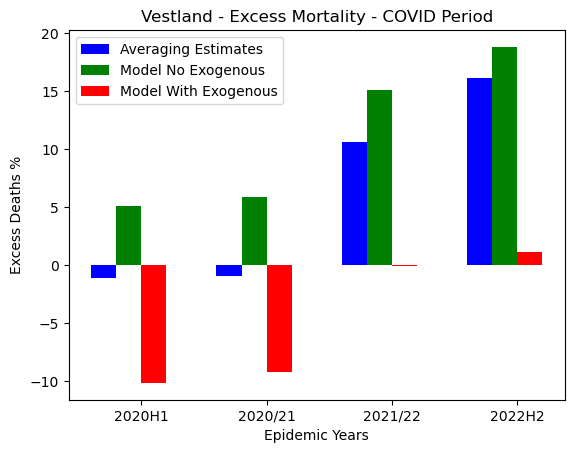

In [105]:


vestland_actual_deaths_total_20 = np.sum(vestland_actual_deaths_20)
lin_ests_excess_20 = (vestland_actual_deaths_total_20 - np.sum(lin_ests_20))/vestland_actual_deaths_total_20 *100 
vestland_NoCom_NoExog_excess_total_20 = (vestland_actual_deaths_total_20 - np.sum(vestland_NoCom_NoExog_deaths_20))/vestland_actual_deaths_total_20 *100
vestland_NoCom_WithExog_excess_total_20 = (vestland_actual_deaths_total_20 - np.sum(vestland_NoCom_WithExog_deaths_20))/vestland_actual_deaths_total_20 *100

vestland_actual_deaths_total_20_21 = np.sum(vestland_actual_deaths_20_21)
lin_ests_excess_20_21 = (vestland_actual_deaths_total_20_21 - np.sum(lin_ests_20_21))/vestland_actual_deaths_total_20_21 *100
vestland_NoCom_NoExog_excess_total_20_21 = (vestland_actual_deaths_total_20_21 - np.sum(vestland_NoCom_NoExog_deaths_20_21))/vestland_actual_deaths_total_20_21 *100
vestland_NoCom_WithExog_excess_total_20_21 = (vestland_actual_deaths_total_20_21 - np.sum(vestland_NoCom_WithExog_deaths_20_21))/vestland_actual_deaths_total_20_21 *100

vestland_actual_deaths_total_21_22 = np.sum(vestland_actual_deaths_21_22)
lin_ests_excess_21_22 = (vestland_actual_deaths_total_21_22 - np.sum(lin_ests_21_22))/vestland_actual_deaths_total_21_22 *100
vestland_NoCom_NoExog_excess_total_21_22 = (vestland_actual_deaths_total_21_22 - np.sum(vestland_NoCom_NoExog_deaths_21_22))/vestland_actual_deaths_total_21_22 *100
vestland_NoCom_WithExog_excess_total_21_22 = (vestland_actual_deaths_total_21_22 - np.sum(vestland_NoCom_WithExog_deaths_21_22))/vestland_actual_deaths_total_21_22 *100

vestland_actual_deaths_total_22 = np.sum(vestland_actual_deaths_22)
lin_ests_excess_22 = (vestland_actual_deaths_total_22 - np.sum(lin_ests_22))/vestland_actual_deaths_total_22 *100
vestland_NoCom_NoExog_excess_total_22 = (vestland_actual_deaths_total_22 - np.sum(vestland_NoCom_NoExog_deaths_22))/vestland_actual_deaths_total_22 *100
vestland_NoCom_WithExog_excess_total_22 = (vestland_actual_deaths_total_22 - np.sum(vestland_NoCom_WithExog_deaths_22))/vestland_actual_deaths_total_22 *100


# Assuming vestland_logmort_full, lin_ests_20, vestland_actual_deaths_20, vestland_NoCom_NoExog_deaths_20, and vestland_NoCom_WithExog_deaths_20 are defined
# vestland_logmort_full.index should be a list or an array of age groups

years = ["2020H1", "2020/21","2021/22", "2022H2"]
r = np.arange(len(years))
width = 0.2  # Adjusting width to fit four bars

# Labels for the legends
labels = ["Averaging Estimates", "Model No Exogenous", "Model With Exogenous","_nolegend_"]

plt.bar(r[0] - 1.5*width, lin_ests_excess_20, width=0.2, align="center", color="blue", label=labels[0])
plt.bar(r[0] - 0.5*width, vestland_NoCom_NoExog_excess_total_20, width=0.2, align="center", color="green", label=labels[1])
plt.bar(r[0] + 0.5*width, vestland_NoCom_WithExog_excess_total_20, width=0.2, align="center", color="red", label=labels[2])
#plt.bar(r[0] + 1.5*width, vestland_actual_deaths_total_20, width=0.2, align="center", color="orange", label=labels[0])

plt.bar(r[1] - 1.5*width, lin_ests_excess_20_21, width=0.2, align="center", color="blue", label=labels[3])
plt.bar(r[1] - 0.5*width, vestland_NoCom_NoExog_excess_total_20_21, width=0.2, align="center", color="green", label=labels[3])
plt.bar(r[1] + 0.5*width, vestland_NoCom_WithExog_excess_total_20_21, width=0.2, align="center", color="red", label=labels[3])
#plt.bar(r[1] + 1.5*width, vestland_actual_deaths_total_20_21, width=0.2, align="center", color="orange", label=labels[0])

plt.bar(r[2] - 1.5*width, lin_ests_excess_21_22, width=0.2, align="center", color="blue", label=labels[3])
plt.bar(r[2] - 0.5*width, vestland_NoCom_NoExog_excess_total_21_22, width=0.2, align="center", color="green", label=labels[3])
plt.bar(r[2] + 0.5*width, vestland_NoCom_WithExog_excess_total_21_22, width=0.2, align="center", color="red", label=labels[3])

plt.bar(r[3] - 1.5*width, lin_ests_excess_22, width=0.2, align="center", color="blue", label=labels[3])
plt.bar(r[3] - 0.5*width, vestland_NoCom_NoExog_excess_total_22, width=0.2, align="center", color="green", label=labels[3])
plt.bar(r[3] + 0.5*width, vestland_NoCom_WithExog_excess_total_22, width=0.2, align="center", color="red", label=labels[3])

plt.xticks(r, years)
plt.legend()
plt.xlabel('Epidemic Years')
plt.ylabel('Excess Deaths %')
plt.title('Vestland - Excess Mortality - COVID Period');
# plt.show()



In [97]:
vestland_pop_inCOVID

2020M01    2020M02    2020M03    2020M04    2020M05    2020M06  \
0  16.966064  20.714707  16.950958  18.694852  16.935853  18.678185   
1   5.026787   6.142926   5.031273   5.553833   5.035760   5.558784   
2   5.046390   6.165440   5.048533   5.571583   5.050675   5.573948   
3   4.284213   5.238841   4.293551   4.742528   4.302888   4.752830   
4   3.474002   4.249426   3.483753   3.849250   3.493505   3.860009   
5   1.869860   2.294549   1.887097   2.091676   1.904334   2.110694   
6   0.807861   0.987019   0.808225   0.891972   0.808589   0.892373   

     2020M07    2020M08    2020M09    2020M10  ...    2022M03    2022M04  \
0  16.920748  16.913195  18.653185  16.898090  ...  16.821423  18.564500   
1   5.040247   5.042490   5.566210   5.046977  ...   5.108165   5.645667   
2   5.052818   5.053889   5.577494   5.056032  ...   5.045942   5.566648   
3   4.312225   4.316894   4.768284   4.326231  ...   4.416916   4.881722   
4   3.503256   3.508132   3.876148   3.517883  ...   3.562088   3.934157   
5   1.921570   1.930189   2.139222   1.947425  ...   2.123466   2.354028   
6   0.808952   0.809134   0.892975   0.809498  ...   0.819353   0.903481   

     2022M05    2022M06    2022M07    2022M08    2022M09    2022M10  \
0  16.829109  18.572981  16.836796  16.840640  18.585704  16.848327   
1   5.125329   5.664605   5.142493   5.151075   5.693012   5.168239   
2   5.044320   5.564858   5.042697   5.041886   5.562173   5.040264   
3   4.431831   4.898179   4.446746   4.454203   4.922864   4.469118   
4   3.569076   3.941867   3.576063   3.579557   3.953432   3.586545   
5   2.143511   2.376145   2.163556   2.173579   2.409321   2.193624   
6   0.818323   0.902346   0.817294   0.816779   0.900642   0.815750   

     2022M11    2022M12  
0  18.594185  16.856014  
1   5.711951   5.185403  
2   5.560383   5.038641  
3   4.939321   4.484033  
4   3.961142   3.593532  
5   2.431438   2.213669  
6   0.899506   0.814720  

[7 rows x 36 columns]